In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)

num_samples = 500
mu1 = np.array([177, 85])
mu2 = np.array([163, 70])
covariance_matrix = np.array([[10, 8], [8, 15]])
print(num_samples//2)

class_0_data = np.random.multivariate_normal(mu1, covariance_matrix, num_samples//2)
class_1_data = np.random.multivariate_normal(mu2, covariance_matrix, num_samples//2)
print(len(class_0_data))
labels_0 = np.zeros(num_samples//2)
labels_1 = np.ones(num_samples//2)

data = np.concatenate((class_0_data, class_1_data), axis=0) 
print(data)
labels = np.concatenate((labels_0, labels_1), axis=0)
print(len(labels))

250
250
[[175.88158629  83.00503697]
 [172.75660218  84.44621641]
 [178.01662718  85.5806312 ]
 [171.47064153  80.10832245]
 [177.38363024  87.38067354]
 [179.01586098  86.14632062]
 [179.47341422  81.80923241]
 [182.58831675  90.67472621]
 [179.22767338  89.10670284]
 [181.76701836  86.64536601]
 [173.40200196  79.33250432]
 [179.14678093  83.03870686]
 [178.29214667  87.13759768]
 [179.50116967  89.689246  ]
 [179.10272406  86.86073516]
 [175.60006972  89.44191173]
 [178.76596552  83.77823033]
 [176.76973431  80.5040663 ]
 [179.63885508  81.87532735]
 [180.27319773  90.12663945]
 [174.72094965  82.48718073]
 [177.80535777  85.06382994]
 [182.17899881  89.57817125]
 [176.51836899  87.96669284]
 [178.95260275  81.61556646]
 [176.75241938  83.34391396]
 [177.83213104  88.22751919]
 [172.68662413  82.32364107]
 [179.77714367  87.71805409]
 [174.50826477  84.95307632]
 [178.60057473  86.54100159]
 [181.95046427  87.63525695]
 [172.58314046  83.63883727]
 [175.55406717  86.47145605]
 [177.

Test Accuracy: 0.98


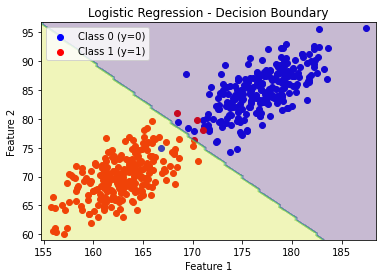

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = logreg.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Plot the data points and decision boundary
plt.scatter(class_0_data[:, 0], class_0_data[:, 1], c='blue', marker='o', label='Class 0 (y=0)')
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='red', marker='o', label='Class 1 (y=1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

plt.legend()
plt.title('Logistic Regression - Decision Boundary')
plt.show()

In [51]:
# For testing
sample_data_point = np.array([175, 69]).reshape(1, -1)

# Predict the class label for the data point
predicted_label = logreg.predict(sample_data_point)

# Print the predicted label
print("Predicted Label:", predicted_label[0])

Predicted Label: 1.0


In [56]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Compute the cost (log-likelihood) and gradient
def compute_cost_and_gradient(w, b, X, Y):
    m = X.shape[1]
    
    # Forward pass (compute activation)
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Compute cost
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    # Backward pass (compute gradient)
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    return cost, dw, db

# Perform gradient descent to optimize parameters
def gradient_descent(w, b, X, Y, learning_rate, num_iterations):
    costs = []
    
    for i in range(num_iterations):
        cost, dw, db = compute_cost_and_gradient(w, b, X, Y)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Append cost to the list for plotting
        costs.append(cost)
        
        # Print the cost every 100 iterations (optional)
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    return w, b, costs

# Define the logistic regression model
def logistic_regression_model(X_train, Y_train, X_test, Y_test, learning_rate, num_iterations):
    # Initialize parameters
    w, b = initialize_parameters(X_train.shape[0])
    
    # Perform gradient descent
    w, b, costs = gradient_descent(w, b, X_train, Y_train, learning_rate, num_iterations)
    
    # Make predictions on the test set
    Y_pred = predict(w, b, X_test)
    
    # Calculate accuracy
    accuracy = 1 - np.mean(np.abs(Y_pred - Y_test))
    
    return accuracy, costs

# Predict function
def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute activation
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Convert probabilities to binary predictions
    for i in range(A.shape[1]):
        Y_pred[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_pred

# Example usage
learning_rate = 0.01
num_iterations = 10000

# Transpose data to match the shape
X_train = X_train.T
X_test = X_test.T

# Train the logistic regression model
accuracy, costs = logistic_regression_model(X_train, y_train, X_test, y_test, learning_rate, num_iterations)

# Print accuracy
print(f"Test Accuracy: {accuracy}")


Cost after iteration 0: 0.6931471805599452
Cost after iteration 100: 10.604748813565363
Cost after iteration 200: 55.54674949317365
Cost after iteration 300: 33.04224138633309
Cost after iteration 400: 35.96256692766921
Cost after iteration 500: 27.34560952363766
Cost after iteration 600: 20.724053945663613
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan


C:\Users\MAK\AppData\Local\Temp\ipykernel_8908\3965855956.py:21: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
C:\Users\MAK\AppData\Local\Temp\ipykernel_8908\3965855956.py:21: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))


Cost after iteration 1300: nan
Cost after iteration 1400: nan
Cost after iteration 1500: nan
Cost after iteration 1600: nan
Cost after iteration 1700: nan
Cost after iteration 1800: nan
Cost after iteration 1900: nan
Cost after iteration 2000: nan
Cost after iteration 2100: nan
Cost after iteration 2200: nan
Cost after iteration 2300: nan
Cost after iteration 2400: nan
Cost after iteration 2500: nan
Cost after iteration 2600: nan
Cost after iteration 2700: nan
Cost after iteration 2800: nan
Cost after iteration 2900: nan
Cost after iteration 3000: nan
Cost after iteration 3100: nan
Cost after iteration 3200: nan
Cost after iteration 3300: nan
Cost after iteration 3400: 23.58270836567621
Cost after iteration 3500: nan
Cost after iteration 3600: nan
Cost after iteration 3700: nan
Cost after iteration 3800: nan
Cost after iteration 3900: nan
Cost after iteration 4000: nan
Cost after iteration 4100: nan
Cost after iteration 4200: nan
Cost after iteration 4300: nan
Cost after iteration 4400

[[171.57085003  78.98629684   1.        ]
 [170.686774    84.09032416   1.        ]
 [173.54288846  76.94941978   1.        ]
 ...
 [161.5423476   69.4318498    1.        ]
 [163.38300699  70.84367455   1.        ]
 [166.6918481   73.79468479   1.        ]]
(3, 1)
(500, 3)
(500, 1)


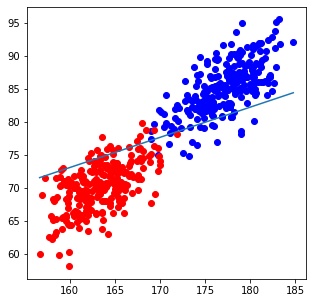

[[0.69314718]]


In [3]:
# Method - II

from scipy.special import expit

def draw(x1, x2):
    ln = plt.plot(x1, x2)
    plt.pause(0.001)
    ln[0].remove()

# Sigmoid function
def sigmoid(z):
#     sig = 1 / (1 + np.exp(-z)) #The expit function will handle the input values more gracefully and return the sigmoid values without triggering the overflow warning.
    z = np.clip(z, -500, 500)
    sig = expit(z)
    return sig

# calculate_error (Log-likelihood function)
def calculate_error(line_parameters, data, y):
    m = data.shape[0]
    p = sigmoid(data*line_parameters)
    
    cross_entropy=-(1/m)*(np.log(p).T*y + np.log(1-p).T*(1-y))
    return cross_entropy

# Gradient descent
def gradient_descent(line_parameters, points, y, alpha):#alpha is learning rate. Gradient descent better classify our data 
    m = points.shape[0]
    for i in range(2000): #the more we increase the number of iterations the better classify we get our data
#         print(len(points))
#         print(len(line_parameters))
        p = sigmoid(points*line_parameters) 
        gradient = (points.T * (p - y))*(1/m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max()])
        x2 = - b / w2 + (x1 * (- w1 / w2))
    draw (x1, x2)

n_pts = 500
np.random.seed(0)
bias = np.ones((n_pts,1))
# np.random.multivariate_normal gives two dimensional array so its better to add bias term to make it 3 dimensional or else dont consider the bias in the line parameters
class_0_data = np.random.multivariate_normal(mu1, covariance_matrix, num_samples//2)
class_1_data = np.random.multivariate_normal(mu2, covariance_matrix, num_samples//2)

data = np.vstack((class_0_data, class_1_data))
data = np.hstack((data, bias))
print(data)
labels = np.concatenate((labels_0, labels_1), axis=0)
labels = labels.reshape(n_pts, 1)
# print(labels)
line_parameters = np.matrix([np.zeros(3)]).T


_, ax = plt.subplots(figsize=(5, 5))
plt.scatter(class_0_data[:, 0], class_0_data[:, 1], c='blue', marker='o', label='Class 0 (y=0)')
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='red', marker='o', label='Class 1 (y=1)')

print(line_parameters.shape)
print(data.shape)
print(labels.shape)

gradient_descent(line_parameters, data, labels, 0.06)

plt.show()

print(calculate_error(line_parameters, data, labels))

# Example usage:
# X_train, y_train = Your training data
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# coefficients = logistic_regression(X_train, y_train)

Test Accuracy: 0.98
Confusion Matrix:
 [[46  0]
 [ 2 52]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        46
         1.0       1.00      0.96      0.98        54

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



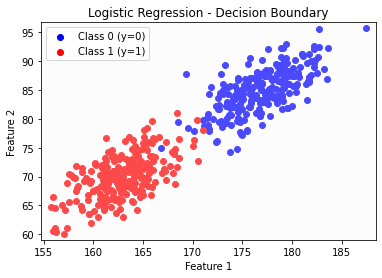

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

def draw(x1, x2):
    ln = plt.plot(x1, x2)
    plt.pause(0.001)
    ln[0].remove()

# Sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)
    sig = expit(z)
    return sig

# Calculate error (cross entropy using log-likelihood function)
def calculate_error(line_parameters, data, y):
    m = data.shape[0]
    p = sigmoid(np.dot(data, line_parameters))
    cross_entropy = -(1/m) * (np.log(p).T @ y + np.log(1-p).T @ (1-y))
    return cross_entropy

# Gradient descent
def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(2000):
        p = sigmoid(np.dot(points, line_parameters))
        gradient = (np.dot(points.T, (p - y))) * (1/m)
        line_parameters = line_parameters - alpha * gradient
    return line_parameters

# Generate synthetic data
num_samples = 500
mu1 = np.array([177, 85])
mu2 = np.array([163, 70])
covariance_matrix = np.array([[10, 8], [8, 15]])

class_0_data = np.random.multivariate_normal(mu1, covariance_matrix, num_samples // 2)
class_1_data = np.random.multivariate_normal(mu2, covariance_matrix, num_samples // 2)

data = np.vstack((class_0_data, class_1_data))
labels = np.concatenate((np.zeros(num_samples // 2), np.ones(num_samples // 2)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize features (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a bias term
bias = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, bias))

# Initialize line parameters
line_parameters = np.zeros((X_train.shape[1], 1))

# Train the logistic regression model
line_parameters = gradient_descent(line_parameters, X_train, y_train.reshape(-1, 1), alpha=0.1)

# Make predictions on the test data
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias to test data
y_pred = sigmoid(np.dot(X_test, line_parameters))

# Apply a threshold for binary classification
y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

# Print evaluation metrics
print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.scatter(class_0_data[:, 0], class_0_data[:, 1], c='blue', marker='o', label='Class 0 (y=0)')
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='red', marker='o', label='Class 1 (y=1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the decision boundary
# plt.figure(figsize=(8, 6))
h = 0.02  # Step size in the mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx.ravel())], line_parameters))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.legend()
plt.title('Logistic Regression - Decision Boundary')
plt.show()


C:\Users\MAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MAK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.46
Confusion Matrix:
 [[46  0]
 [54  0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      1.00      0.63        46
         1.0       0.00      0.00      0.00        54

    accuracy                           0.46       100
   macro avg       0.23      0.50      0.32       100
weighted avg       0.21      0.46      0.29       100



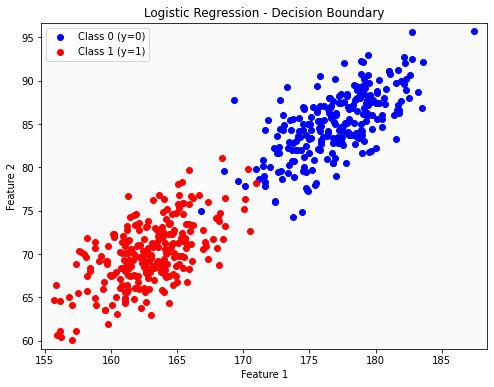

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.special import expit

# Set random seed for reproducibility
np.random.seed(42)

# Sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)
    sig = expit(z)
    return sig

# Calculate error (log-likelihood function)
def calculate_error(line_parameters, data, y):
    m = data.shape[0]
    p = sigmoid(np.dot(data, line_parameters))
    
    cross_entropy = -(1/m) * (np.log(p).T @ y + np.log(1-p).T @ (1-y))
    return cross_entropy

# Gradient descent
def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(2000):
        p = sigmoid(np.dot(points, line_parameters))
        gradient = (np.dot(points.T, (p - y))) * (1/m)
        line_parameters = line_parameters - alpha * gradient
    return line_parameters

# Generate synthetic data
num_samples = 500
mu1 = np.array([177, 85])
mu2 = np.array([163, 70])
covariance_matrix = np.array([[10, 8], [8, 15]])

class_0_data = np.random.multivariate_normal(mu1, covariance_matrix, num_samples // 2)
class_1_data = np.random.multivariate_normal(mu2, covariance_matrix, num_samples // 2)

data = np.vstack((class_0_data, class_1_data))
labels = np.concatenate((np.zeros(num_samples // 2), np.ones(num_samples // 2)))

# scaler = StandardScaler()
# data = scaler.fit_transform(data)
# print(data.shape)
# X_test = scaler.transform(X_test)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Standardize features (feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test)

# Add a bias term
bias = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, bias))

# Initialize line parameters
line_parameters = np.zeros((X_train.shape[1], 1))

# Train the logistic regression model using your custom functions
line_parameters = gradient_descent(line_parameters, X_train, y_train.reshape(-1, 1), alpha=0.06)

# Calculate the coefficients of the decision boundary line
# w1, w2 = line_parameters[:-1]  # Exclude the bias term
# b = line_parameters[-1]  # Bias term
# x1 = np.array([data[:, 0].min() - 1, data[:, 0].max() + 1])
# # Calculate x2 using the decision boundary equation: w1*x1 + w2*x2 + b = 0
# x2 = - b / w2 + (x1 * (- w1 / w2))
# # Plot the decision boundary line
# plt.plot(x1, x2, color='green', linestyle='--', label='Decision Boundary')

# Make predictions on the test data
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias to test data
y_pred = sigmoid(np.dot(X_test, line_parameters))

# Apply a threshold for binary classification
y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

# Print evaluation metrics
print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
h = 0.02  # Step size in the mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = sigmoid(np.dot(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis], np.ones((len(xx.ravel()), 1)))), line_parameters))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(class_0_data[:, 0], class_0_data[:, 1], c='blue', marker='o', label='Class 0 (y=0)')
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='red', marker='o', label='Class 1 (y=1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression - Decision Boundary')
plt.show()


Test Accuracy: 0.45
Confusion Matrix:
 [[39  7]
 [48  6]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.45      0.85      0.59        46
         1.0       0.46      0.11      0.18        54

    accuracy                           0.45       100
   macro avg       0.45      0.48      0.38       100
weighted avg       0.46      0.45      0.37       100



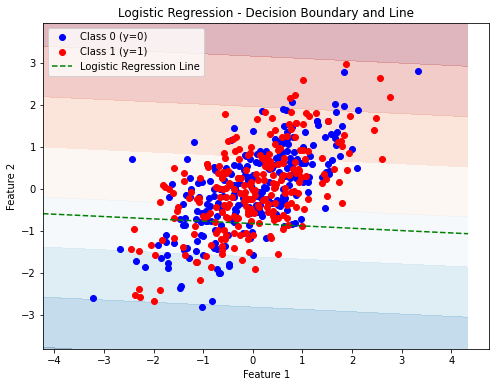

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.special import expit

# Set random seed for reproducibility
np.random.seed(42)

# Sigmoid function
def sigmoid(z):
    z = np.clip(z, -500, 500)
#     sig = expit(z)
    sig = 1 / (1 + np.exp(-z))
    return sig

# Calculate error (log-likelihood function)
def calculate_error(line_parameters, data, y):
    m = data.shape[0]
    p = sigmoid(np.dot(data, line_parameters))
    
    cross_entropy = -(1/m) * (np.log(p).T @ y + np.log(1-p).T @ (1-y))
    return cross_entropy

# Gradient descent
def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(20000):
        p = sigmoid(np.dot(points, line_parameters))
        gradient = (np.dot(points.T, (p - y))) * (1/m)
        line_parameters = line_parameters - alpha * gradient
    return line_parameters

# Generate synthetic data
num_samples = 500
mu1 = np.array([177, 85])
mu2 = np.array([163, 70])
covariance_matrix = np.array([[10, 8], [8, 15]])

class_0_data = np.random.multivariate_normal(mu1, covariance_matrix, num_samples // 2)
class_1_data = np.random.multivariate_normal(mu2, covariance_matrix, num_samples // 2)
scaler = StandardScaler()
class_0_data = scaler.fit_transform(class_0_data)
class_1_data = scaler.fit_transform(class_1_data)

data = np.vstack((class_0_data, class_1_data))
labels = np.concatenate((np.zeros(num_samples // 2), np.ones(num_samples // 2)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


# Add a bias term
bias = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, bias))

# Initialize line parameters
line_parameters = np.zeros((X_train.shape[1], 1))

# Train the logistic regression model using your custom functions
line_parameters = gradient_descent(line_parameters, X_train, y_train.reshape(-1, 1), alpha=0.1)

# Make predictions on the test data
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias to test data
y_pred = sigmoid(np.dot(X_test, line_parameters))

# Apply a threshold for binary classification
y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

# Print evaluation metrics
print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the decision boundary and logistic regression line
plt.figure(figsize=(8, 6))
h = 0.02  # Step size in the mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = sigmoid(np.dot(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis], np.ones((len(xx.ravel()), 1)))), line_parameters))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(class_0_data[:, 0], class_0_data[:, 1], c='blue', marker='o', label='Class 0 (y=0)')
plt.scatter(class_1_data[:, 0], class_1_data[:, 1], c='red', marker='o', label='Class 1 (y=1)')

# Plot the logistic regression line
x_line = np.linspace(x_min, x_max, 100)
y_line = -(line_parameters[2]/line_parameters[1]) + (x_line * (- line_parameters[0] / line_parameters[1]))
plt.plot(x_line, y_line, color='green', linestyle='--', label='Logistic Regression Line')

# x2 = - b / w2 + (x1 * (- w1 / w2))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression - Decision Boundary and Line')
plt.show()


In [52]:
# Testing
import numpy as np

# Assuming mu1, mu2, and covariance_matrix are defined as mentioned in the question
mu1 = np.array([177, 85])
mu2 = np.array([163, 70])
covariance_matrix = np.array([[10, 8], [8, 15]])

n_pts = 250
bias = np.ones(n_pts)
# Generate top_region
# bias = 1  # Assuming bias is defined somewhere above
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T
print(top_region.shape)

# Generate class_0_data with the same shape as top_region
class_0_data = np.random.multivariate_normal(mu1, covariance_matrix, n_pts)
print(class_0_data.shape)
class_0_data = np.c_[class_0_data, bias]
print(class_0_data.shape)

(250, 3)
(250, 2)
(250, 3)


In [4]:
import numpy as np
line_parameters = np.matrix([np.zeros(3)]).T
print(line_parameters)

[[0.]
 [0.]
 [0.]]


In [9]:
np.random.seed(0)
# line_parameters = np.random.randn(3, 1) * 0.01
line_parameters = np.matrix(np.random.rand(3, 1) * 0.01)
print(line_parameters)

[[0.00548814]
 [0.00715189]
 [0.00602763]]


In [22]:
import numpy as np
mu1 = np.array([177, 85]) #1D array
mu2 = np.array([163, 70])
covariance_matrix = np.array([[10, 8], [8, 15]])
print(mu1.shape)
c = np.vstack((mu1, mu2))
d = np.hstack((mu1, mu2))
print("c= ",c.T) # c is 2D array 
print("\nd= ",d.T) # d is 1D array
print("zeros array: ", np.zeros(6).T)

print(c.shape)
print(d.shape)

(2,)
c=  [[177 163]
 [ 85  70]]

d=  [177  85 163  70]
zeros array:  [0. 0. 0. 0. 0. 0.]
(2, 2)
(4,)


(20, 2)
(20, 3)
(20, 1)
[[17.2693882]]


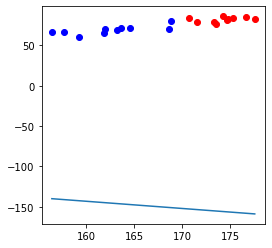

[[17.269788]]


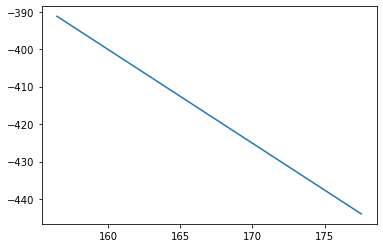

[[17.2693882]]


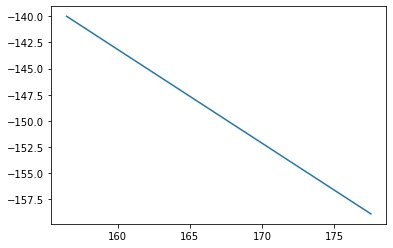

[[17.269788]]


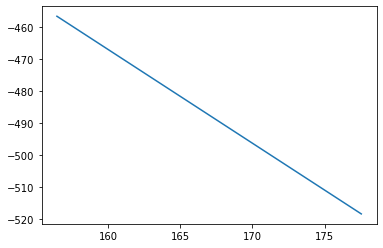

[[17.2693882]]


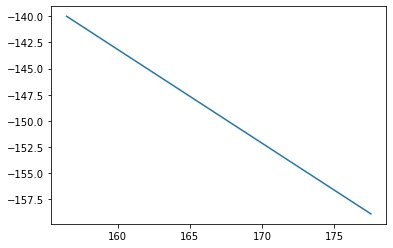

[[17.269788]]


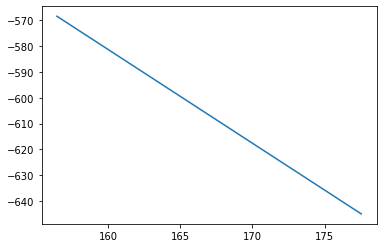

[[17.2693882]]


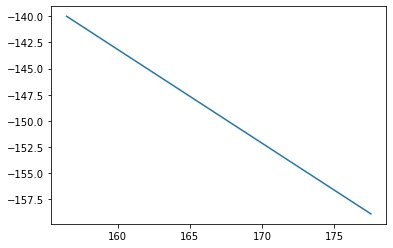

[[17.269788]]


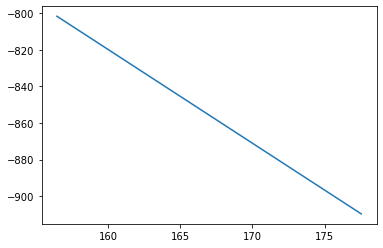

[[17.2693882]]


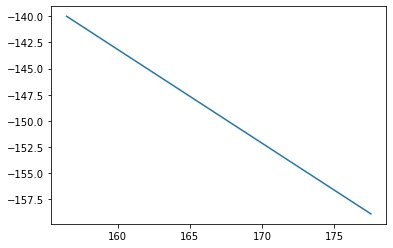

[[17.269788]]


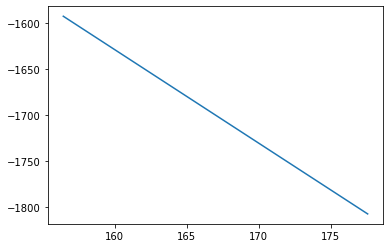

[[17.2693882]]


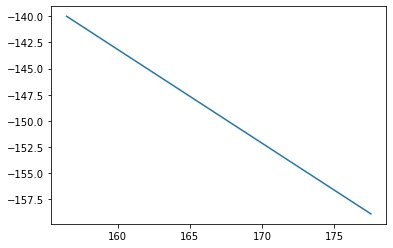

[[17.269788]]


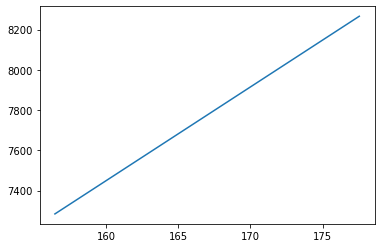

[[17.2693882]]


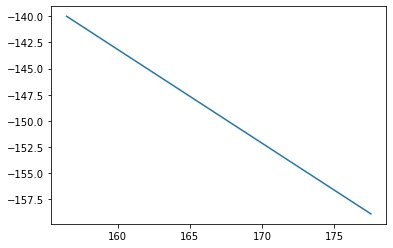

[[17.269788]]


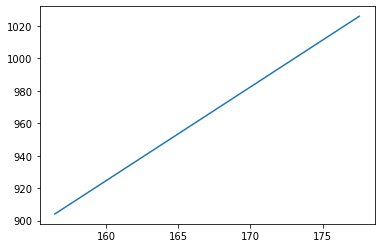

[[17.2693882]]


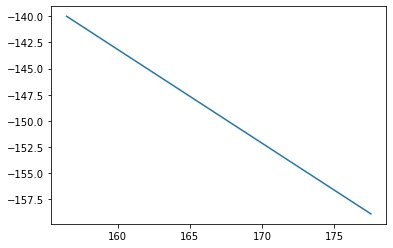

[[17.269788]]


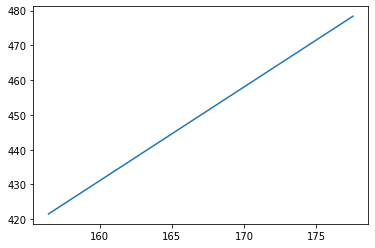

[[17.2693882]]


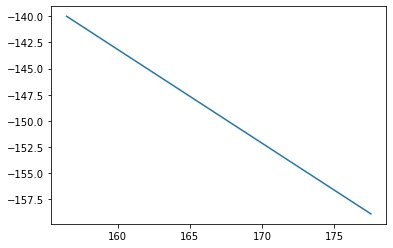

[[17.269788]]


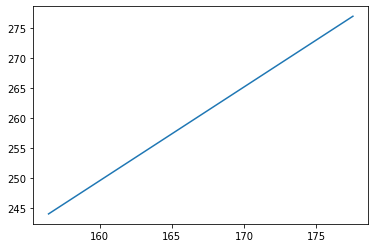

[[17.2693882]]


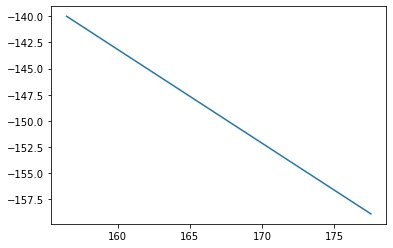

[[17.269788]]


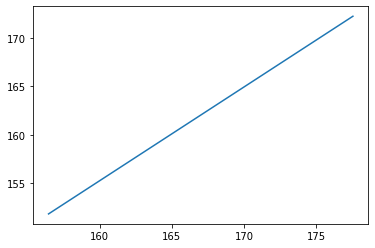

[[17.2693882]]


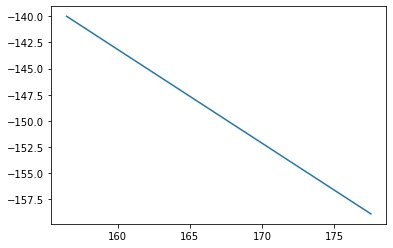

[[17.269788]]


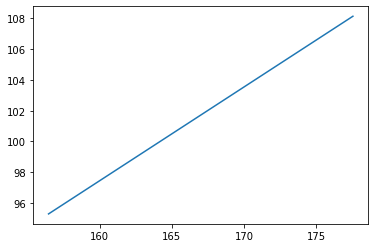

[[17.2693882]]


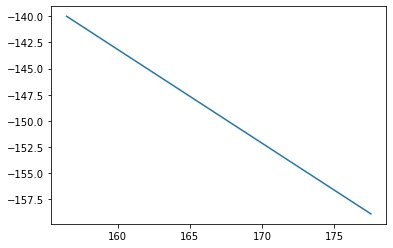

[[16.59790563]]


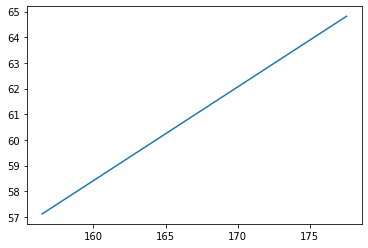

[[17.269788]]


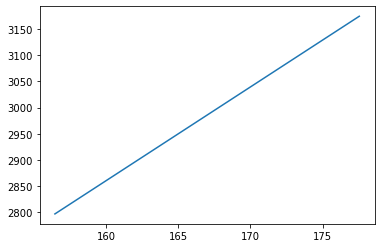

[[17.2693882]]


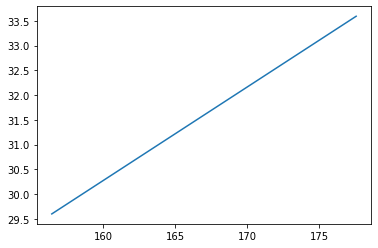

[[17.269788]]


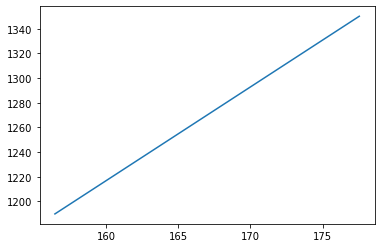

[[17.2693882]]


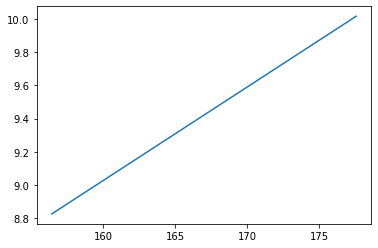

[[17.269788]]


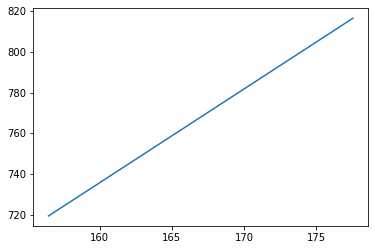

[[17.2693882]]


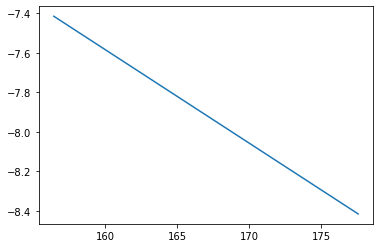

[[17.269788]]


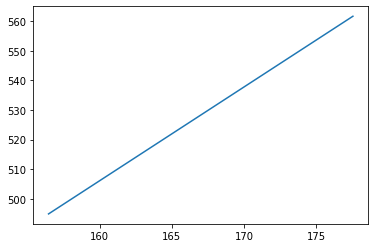

[[17.2693882]]


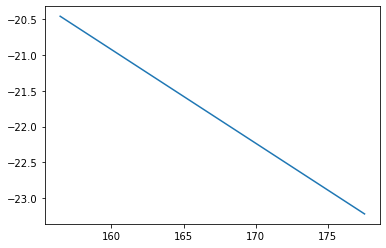

[[17.269788]]


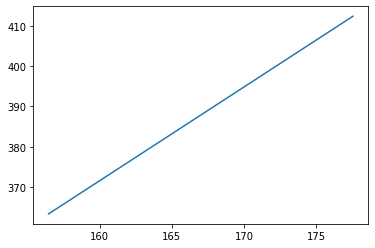

[[17.2693882]]


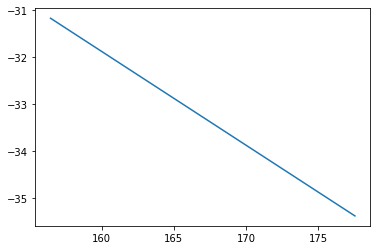

[[17.269788]]


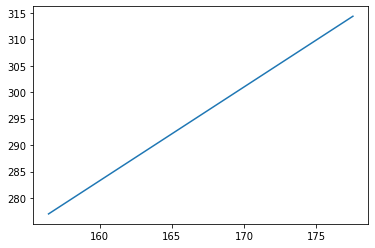

[[17.2693882]]


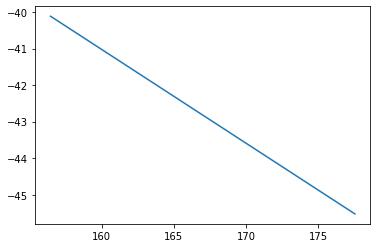

[[17.269788]]


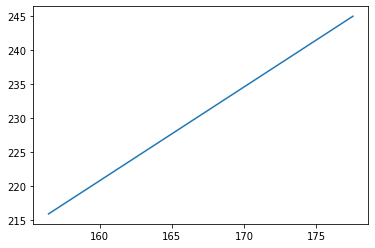

[[17.2693882]]


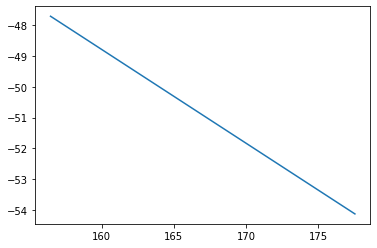

[[17.269788]]


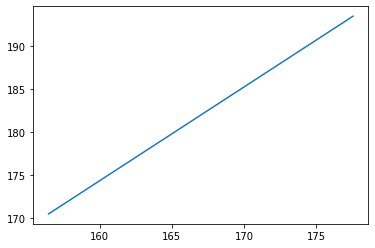

[[17.2693882]]


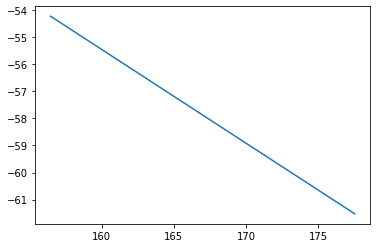

[[17.269788]]


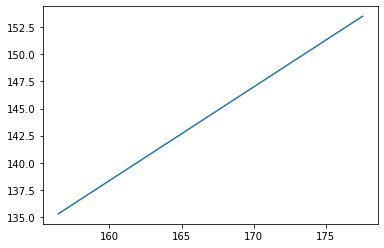

[[17.2693882]]


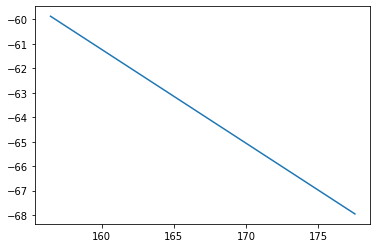

[[17.269788]]


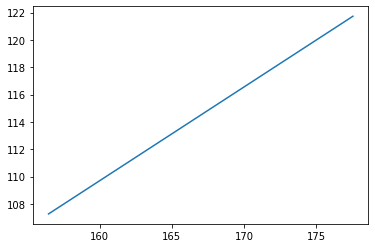

[[17.2693882]]


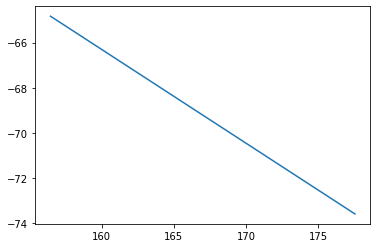

[[17.269788]]


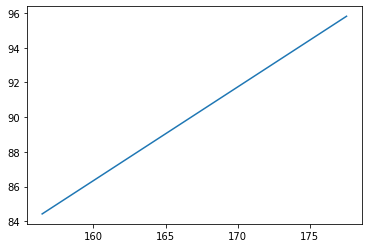

[[17.2693882]]


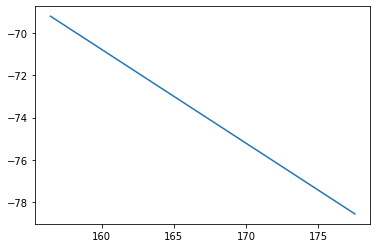

[[10.6905596]]


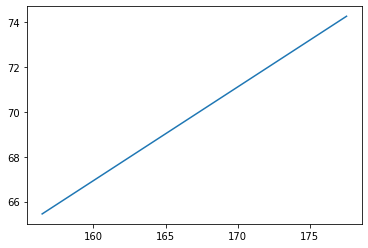

[[17.269788]]


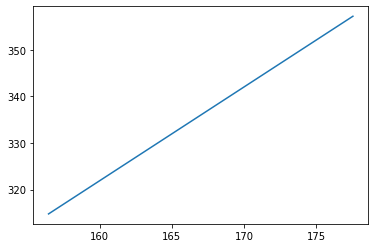

[[17.2693882]]


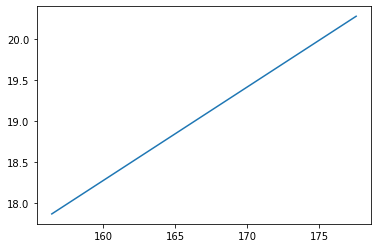

[[17.269788]]


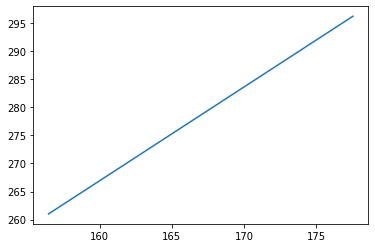

[[17.2693882]]


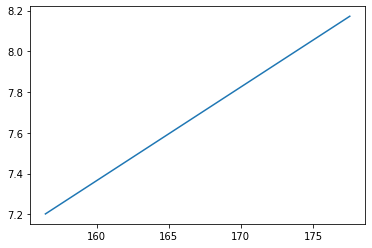

[[17.269788]]


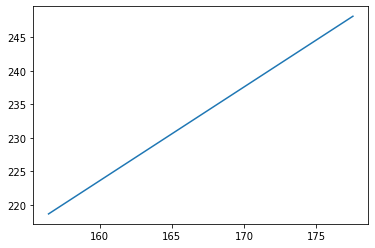

[[17.2693882]]


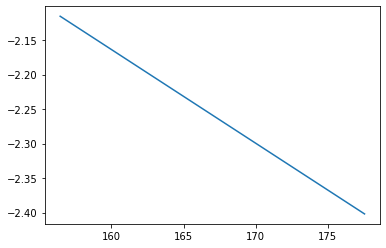

[[17.269788]]


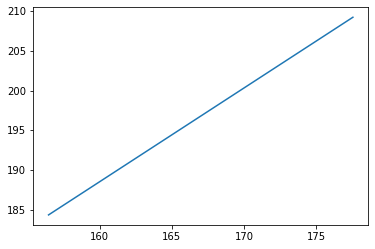

[[17.2693882]]


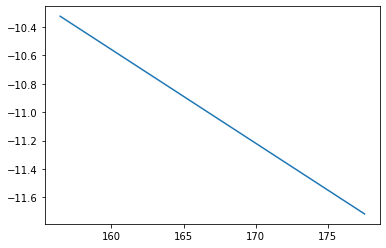

[[17.269788]]


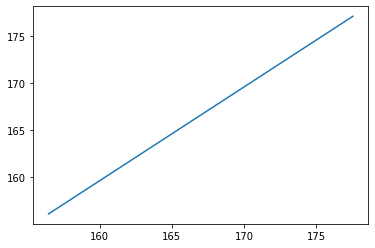

[[17.2693882]]


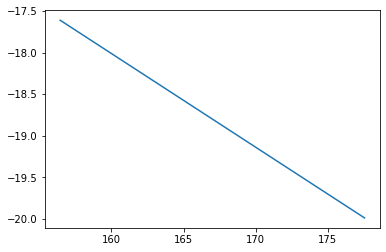

[[17.269788]]


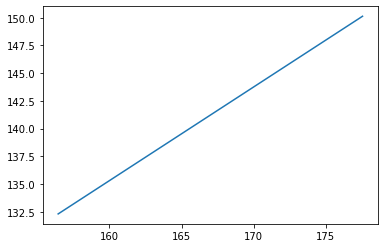

[[17.2693882]]


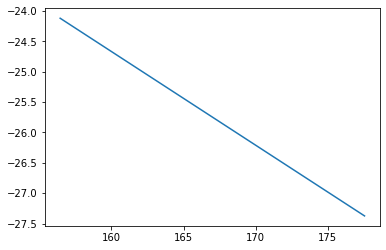

[[17.269788]]


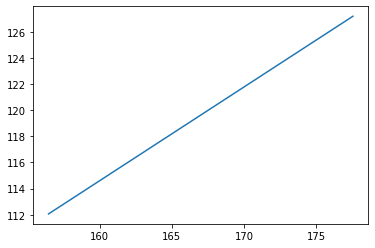

[[17.2693882]]


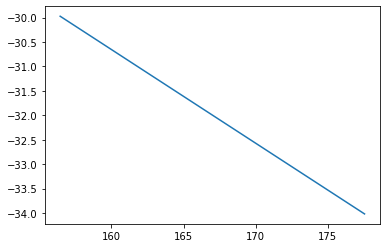

[[17.269788]]


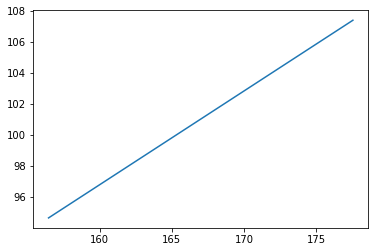

[[17.2693882]]


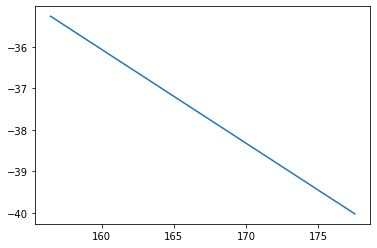

[[17.269788]]


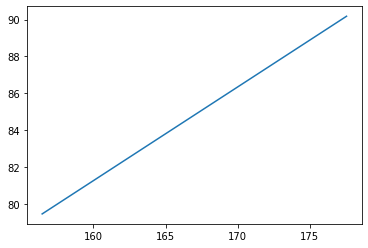

[[17.2693882]]


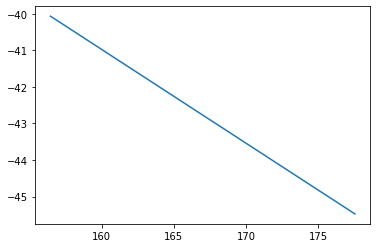

[[8.34998643]]


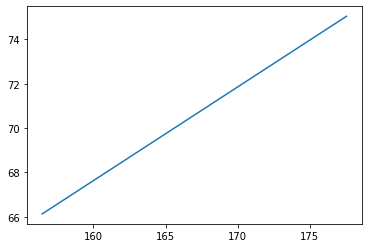

[[17.269788]]


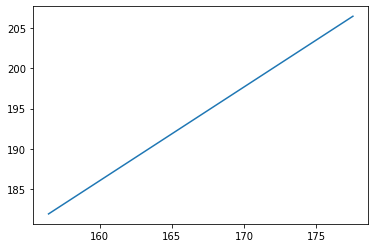

[[17.2693882]]


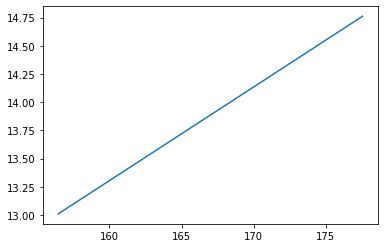

[[17.269788]]


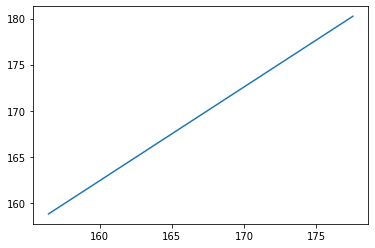

[[17.2693882]]


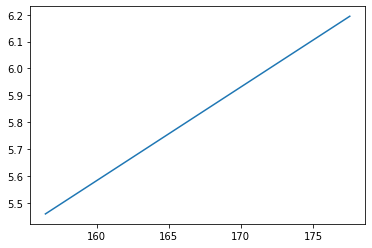

[[17.269788]]


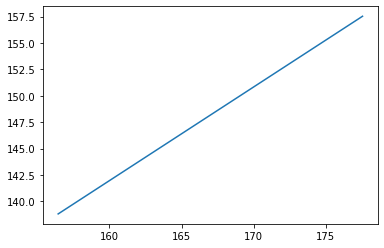

[[17.2693882]]


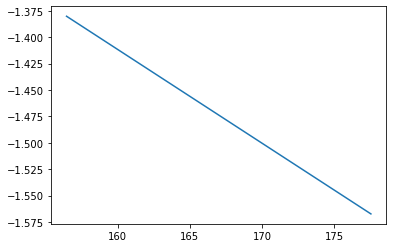

[[17.269788]]


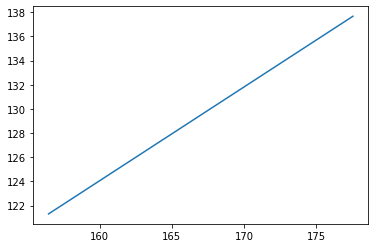

[[17.2693882]]


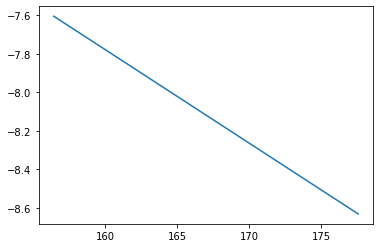

[[17.269788]]


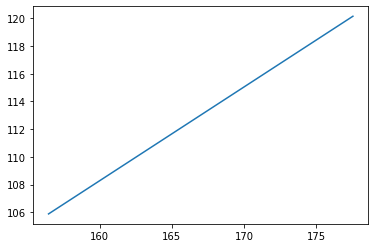

[[17.2693882]]


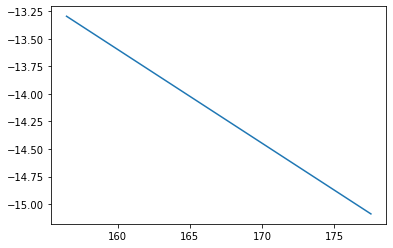

[[17.269788]]


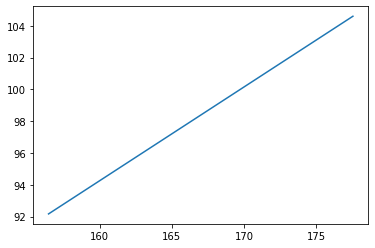

[[17.2693882]]


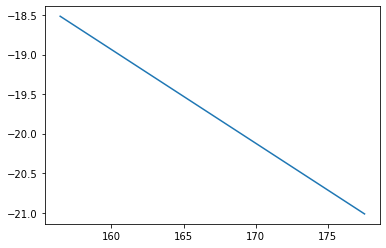

[[17.269788]]


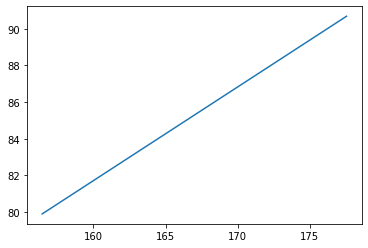

[[17.2693882]]


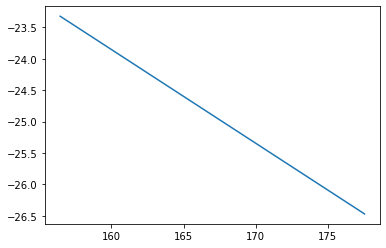

[[1.72693882]]


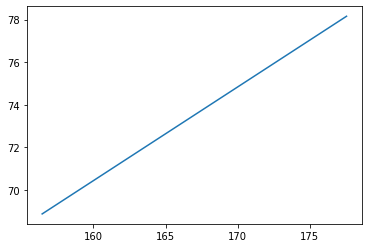

[[17.269788]]


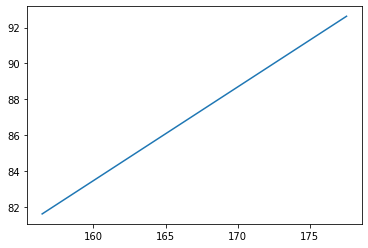

[[17.2693882]]


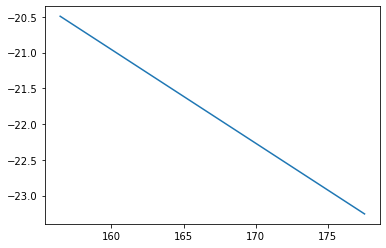

[[3.45391762]]


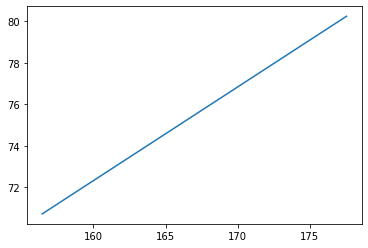

[[3.45391762]]


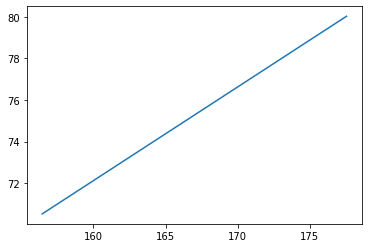

[[3.45391762]]


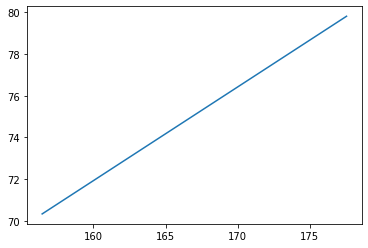

[[3.39371898]]


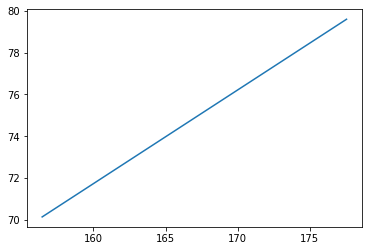

[[2.96852642]]


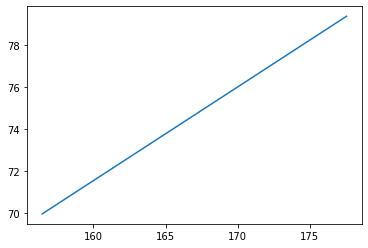

[[2.54335819]]


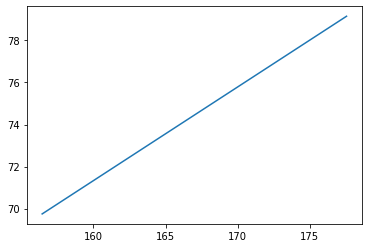

[[2.11821232]]


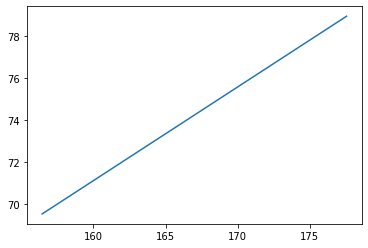

[[1.75136152]]


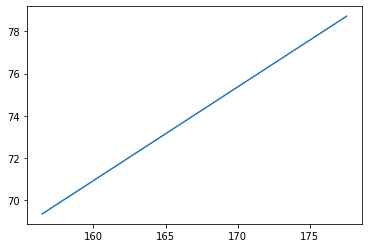

[[13.81603011]]


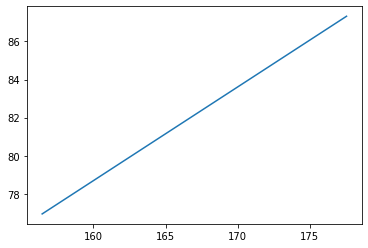

[[17.2693882]]


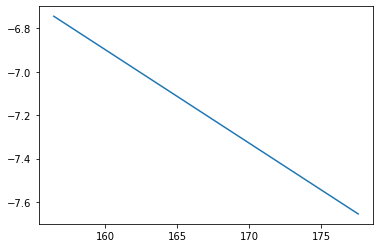

[[17.269788]]


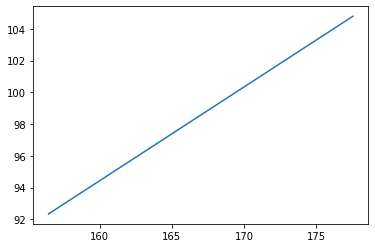

[[17.2693882]]


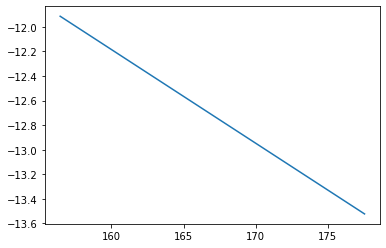

[[17.269788]]


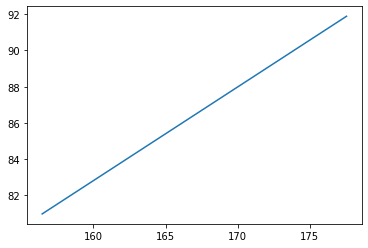

[[17.2693882]]


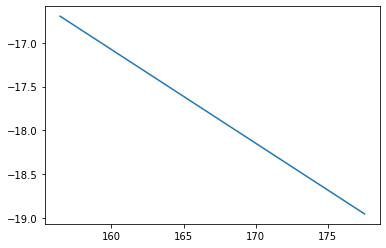

[[3.45391762]]


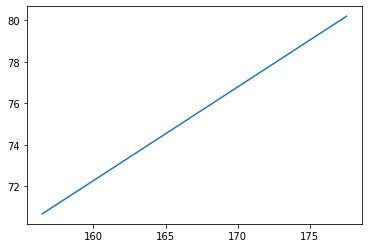

[[3.45391762]]


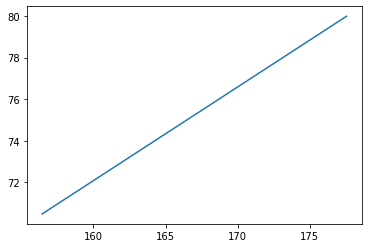

[[3.45391762]]


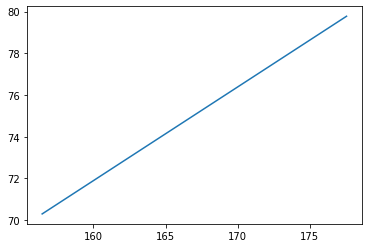

[[3.44864959]]


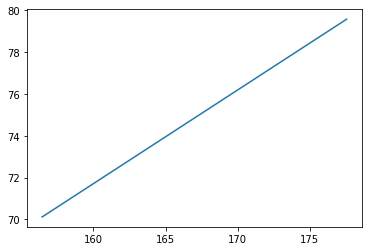

[[3.02046102]]


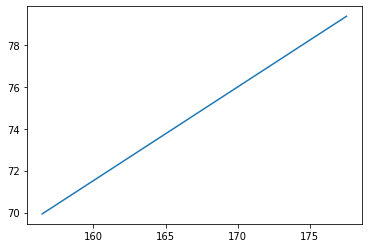

[[2.59529361]]


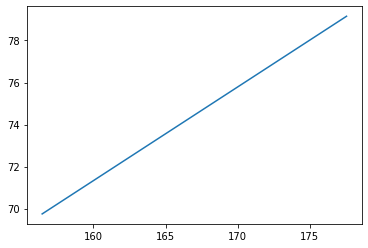

[[2.17013343]]


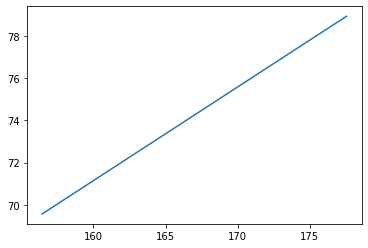

[[1.77370024]]


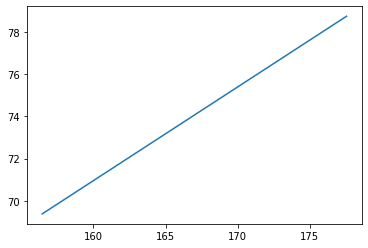

[[9.91361581]]


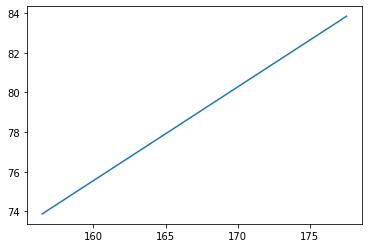

[[17.2693882]]


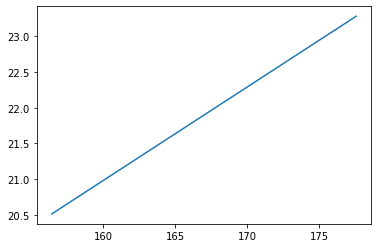

[[17.269788]]


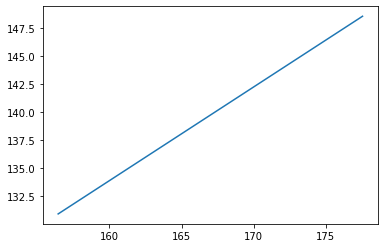

[[17.2693882]]


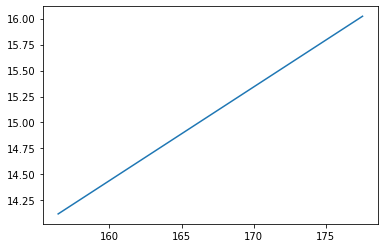

[[17.269788]]


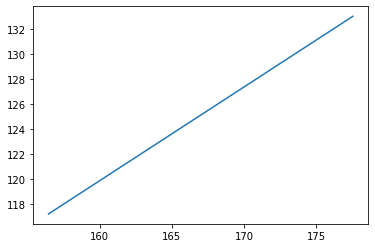

[[17.2693882]]


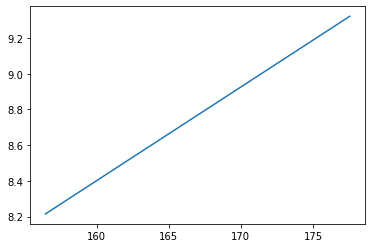

[[17.269788]]


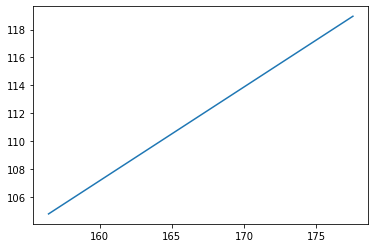

[[17.2693882]]


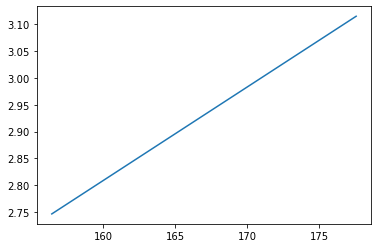

[[17.269788]]


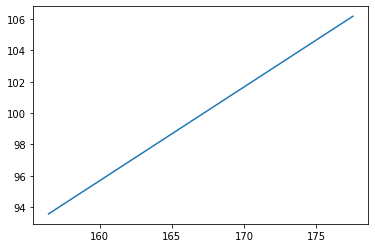

[[17.2693882]]


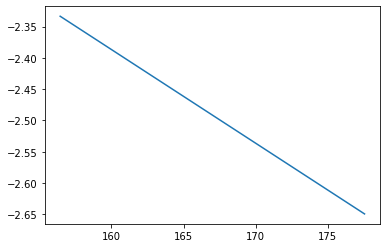

[[17.269788]]


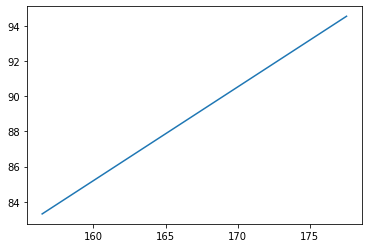

[[17.2693882]]


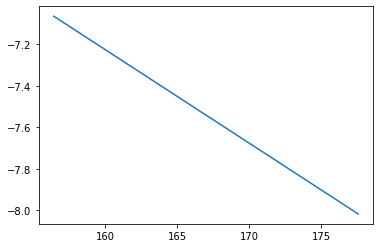

[[10.08460982]]


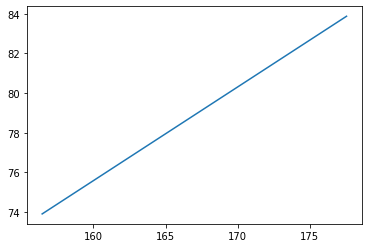

[[17.2693882]]


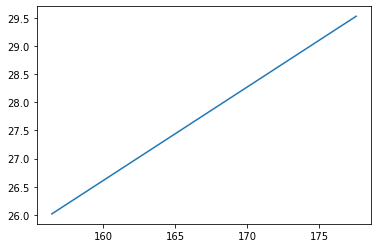

[[17.269788]]


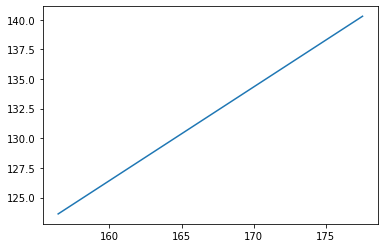

[[17.2693882]]


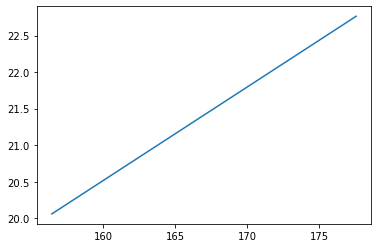

[[17.269788]]


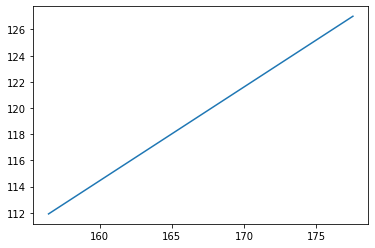

[[17.2693882]]


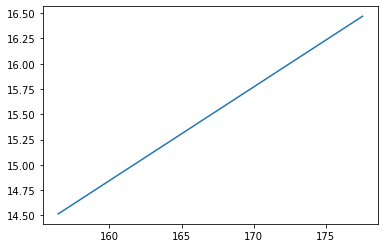

[[17.269788]]


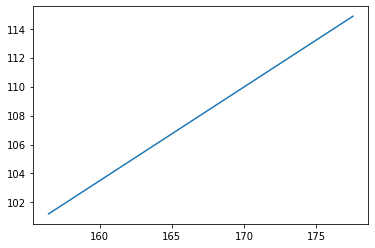

[[17.2693882]]


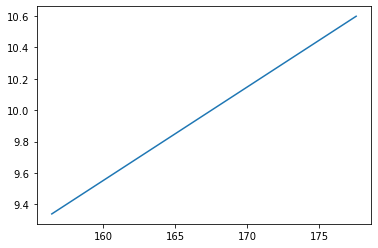

[[17.269788]]


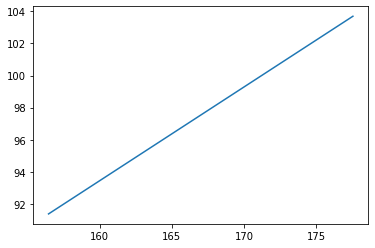

[[17.2693882]]


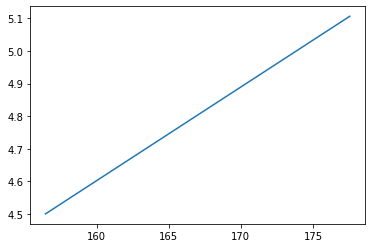

[[17.269788]]


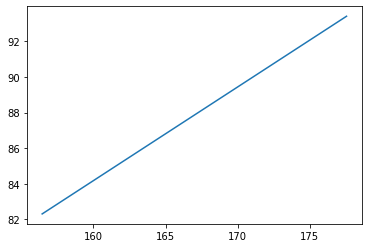

[[17.2693882]]


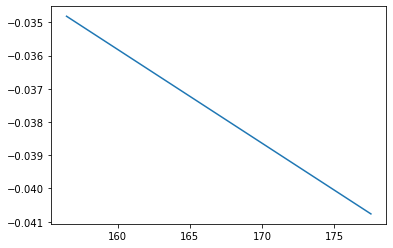

[[10.25471762]]


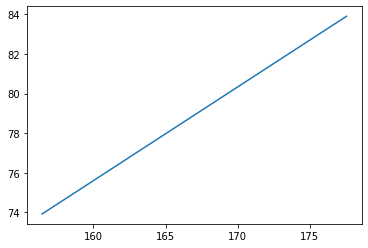

[[17.2693882]]


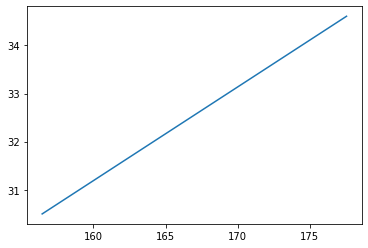

[[17.269788]]


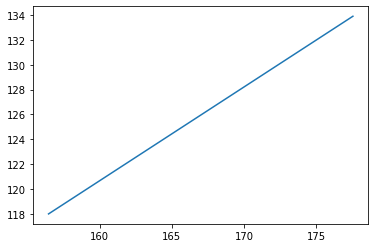

[[17.2693882]]


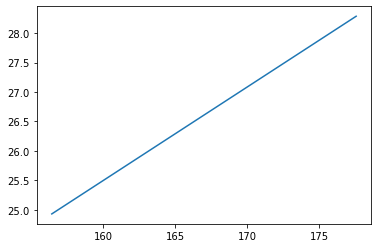

[[17.269788]]


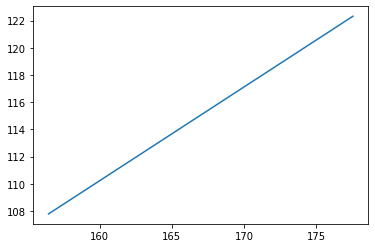

[[17.2693882]]


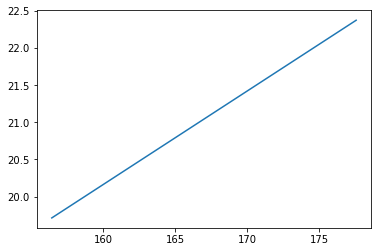

[[17.269788]]


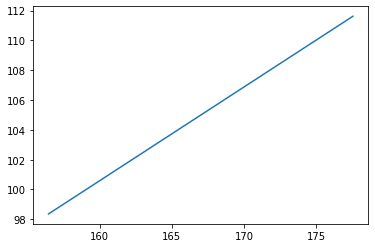

[[17.2693882]]


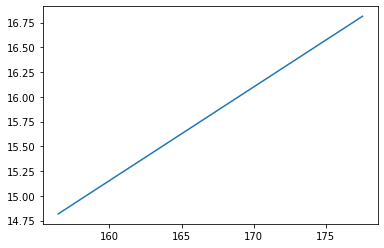

[[17.269788]]


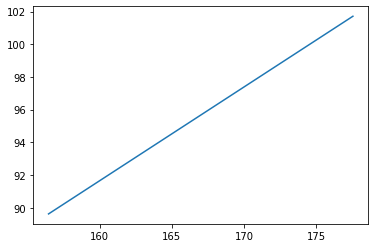

[[17.2693882]]


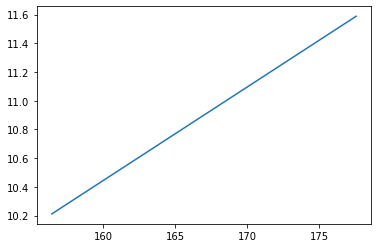

[[17.269788]]


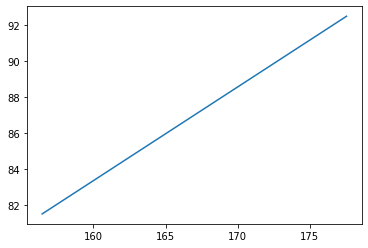

[[17.2693882]]


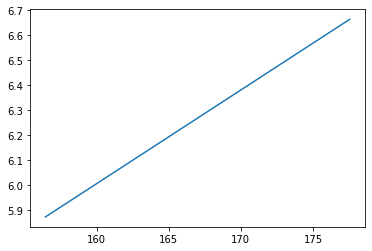

[[10.42477004]]


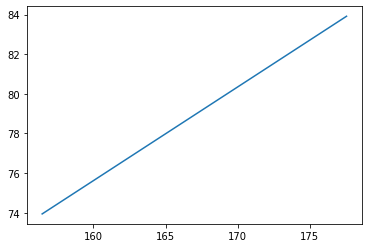

[[17.2693882]]


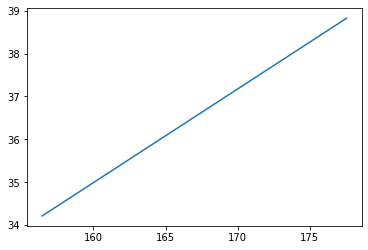

[[17.269788]]


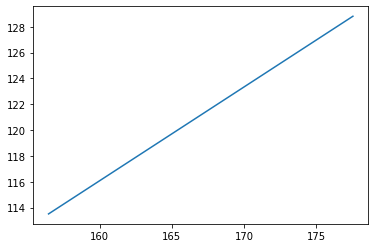

[[17.2693882]]


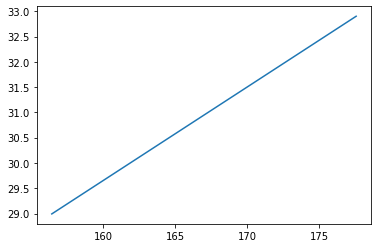

[[17.269788]]


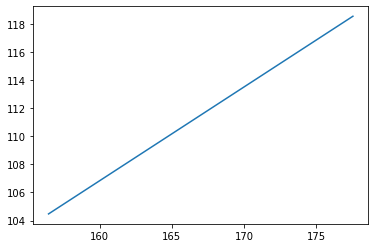

[[17.2693882]]


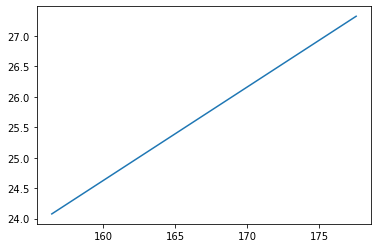

[[17.269788]]


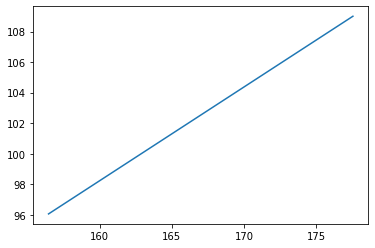

[[17.2693882]]


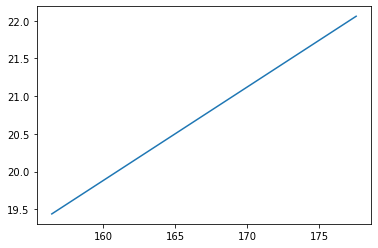

[[17.269788]]


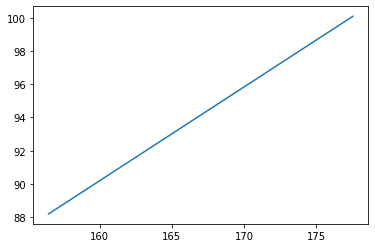

[[17.2693882]]


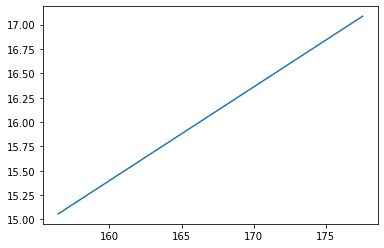

[[17.269788]]


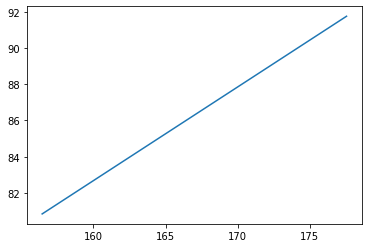

[[17.2693882]]


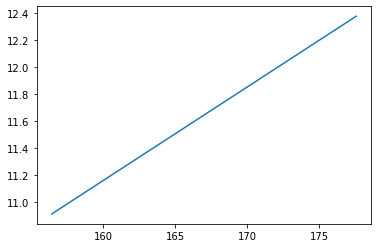

[[10.59481599]]


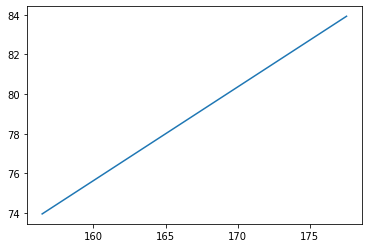

[[17.2693882]]


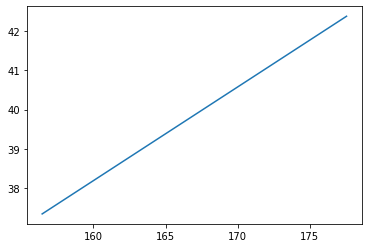

[[17.269788]]


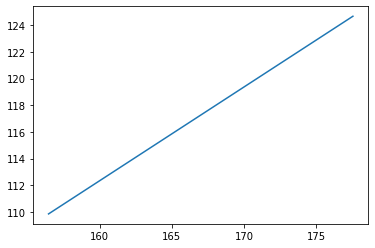

[[17.2693882]]


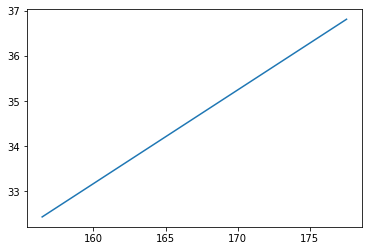

[[17.269788]]


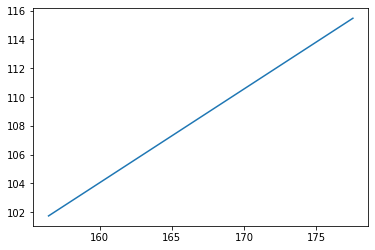

[[17.2693882]]


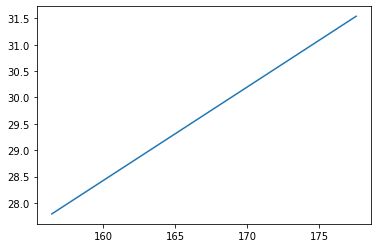

[[17.269788]]


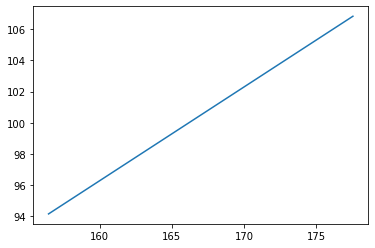

[[17.2693882]]


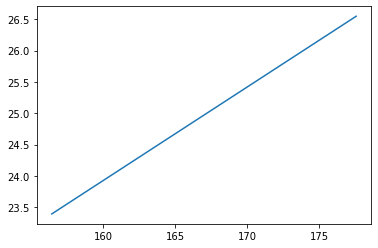

[[17.269788]]


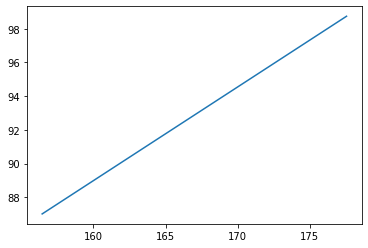

[[17.2693882]]


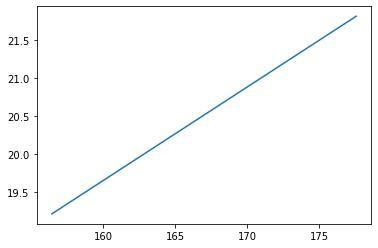

[[17.269788]]


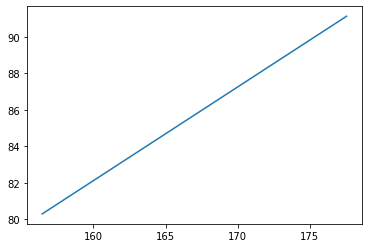

[[17.2693882]]


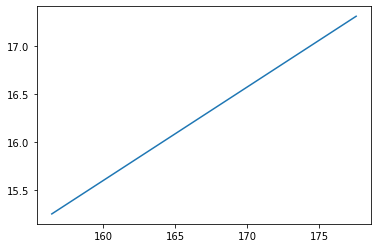

[[10.76486116]]


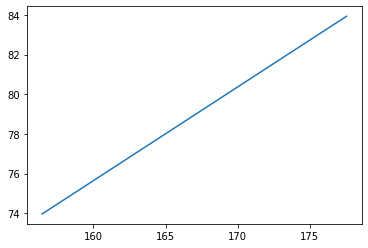

[[17.2693882]]


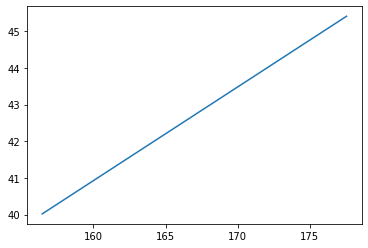

[[17.269788]]


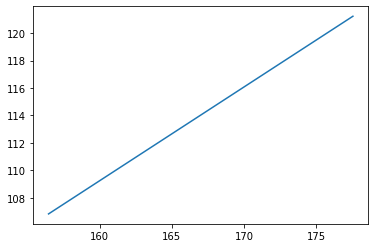

[[17.2693882]]


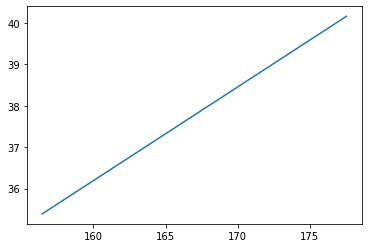

[[17.269788]]


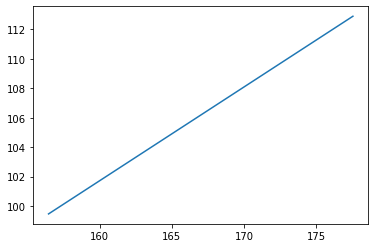

[[17.2693882]]


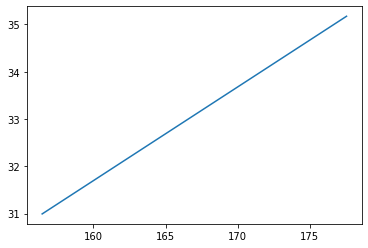

[[17.269788]]


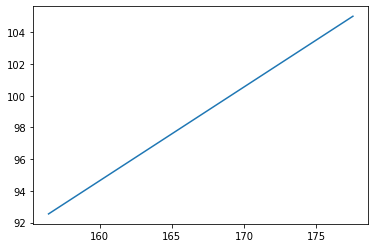

[[17.2693882]]


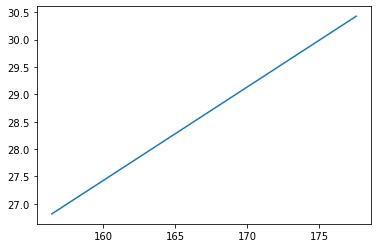

[[17.269788]]


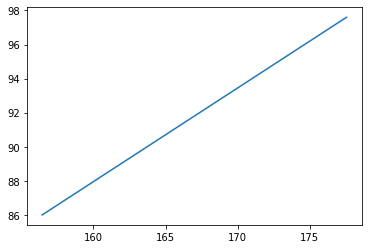

[[17.2693882]]


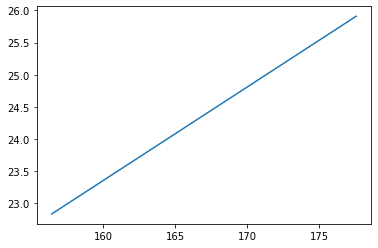

[[17.269788]]


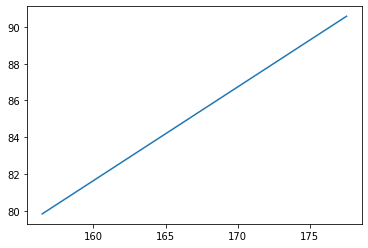

[[17.2693882]]


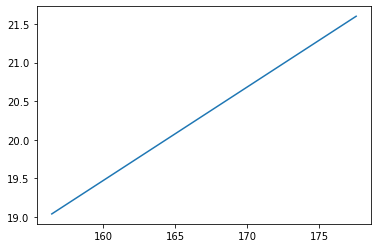

[[10.93490624]]


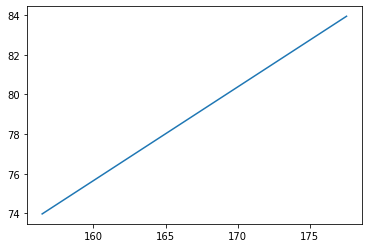

[[17.2693882]]


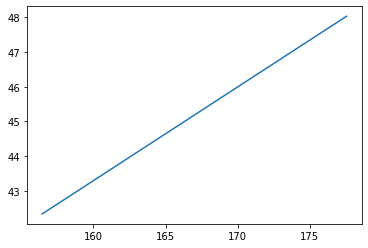

[[17.269788]]


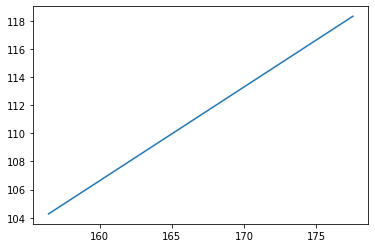

[[17.2693882]]


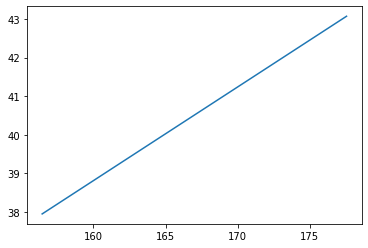

[[17.269788]]


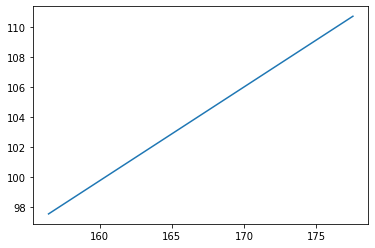

[[17.2693882]]


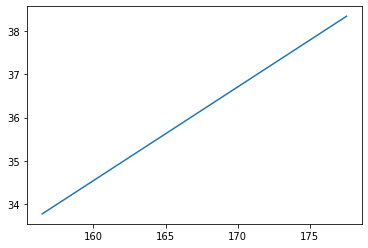

[[17.269788]]


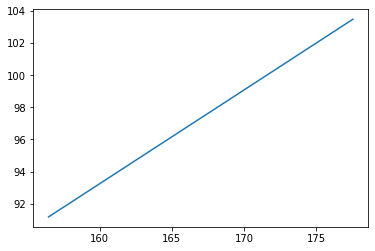

[[17.2693882]]


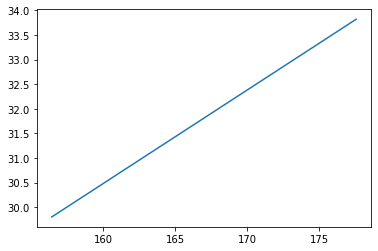

[[17.269788]]


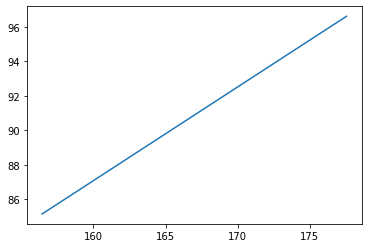

[[17.2693882]]


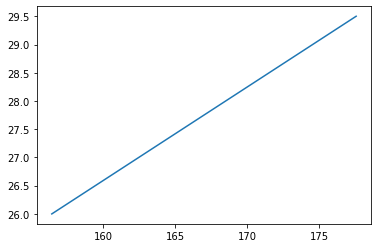

[[17.269788]]


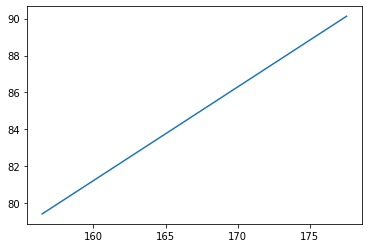

[[17.2693882]]


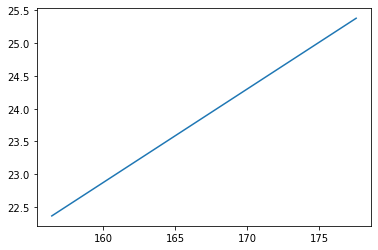

[[11.10495129]]


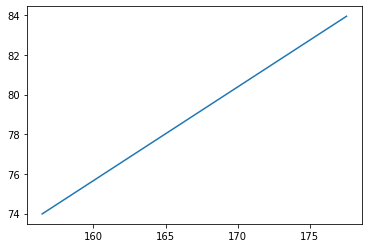

[[17.2693882]]


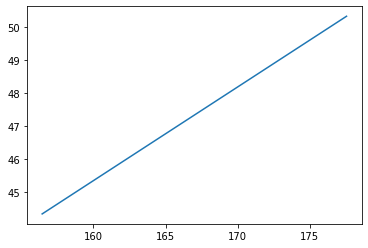

[[17.269788]]


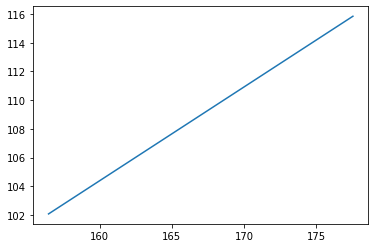

[[17.2693882]]


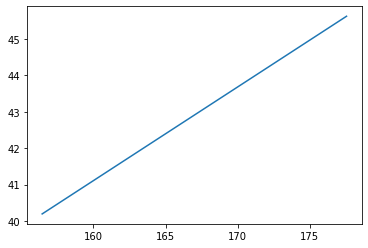

[[17.269788]]


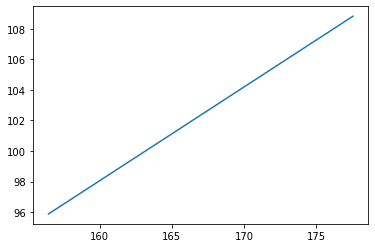

[[17.2693882]]


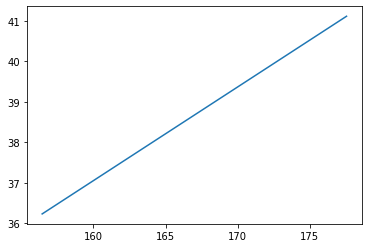

[[17.269788]]


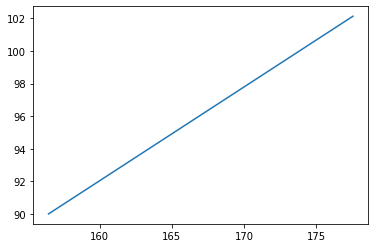

[[17.2693882]]


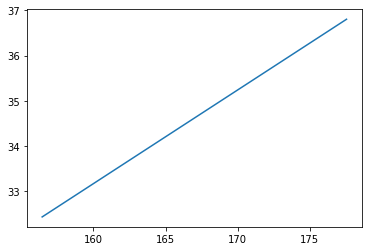

[[17.269788]]


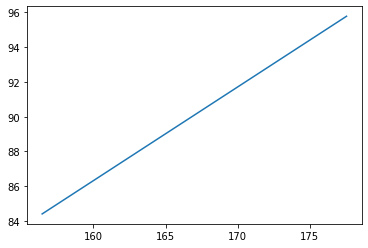

[[17.2693882]]


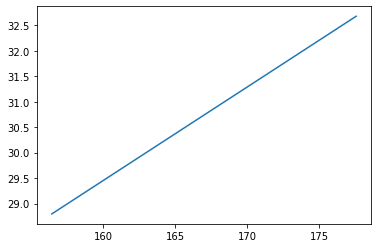

[[17.269788]]


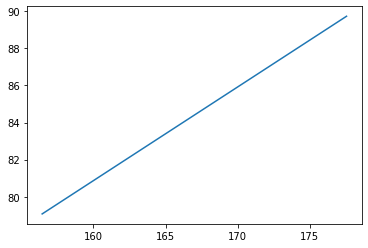

[[17.2693882]]


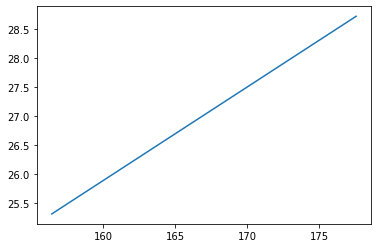

[[11.27499643]]


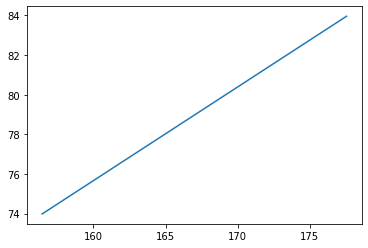

[[17.2693882]]


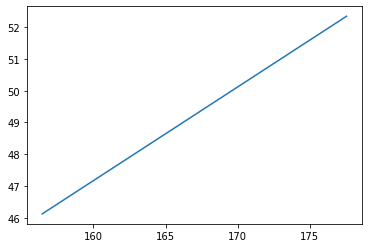

[[17.269788]]


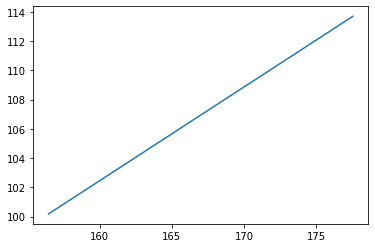

[[17.2693882]]


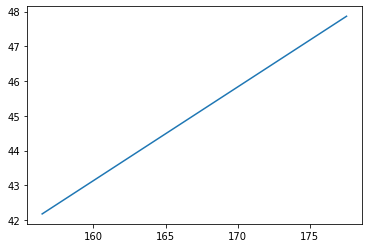

[[17.269788]]


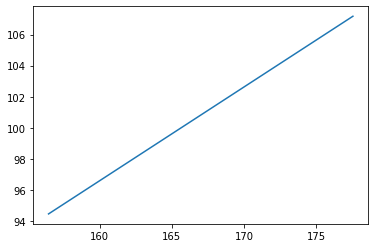

[[17.2693882]]


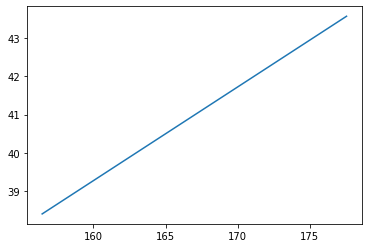

[[17.269788]]


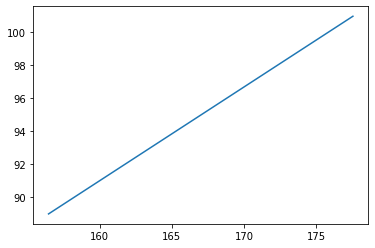

[[17.2693882]]


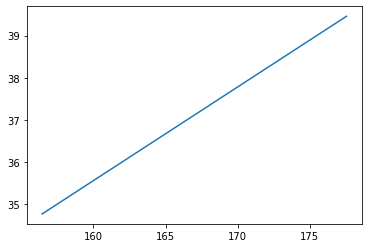

[[17.269788]]


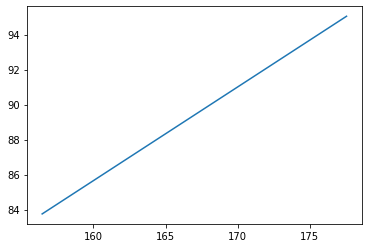

[[17.2693882]]


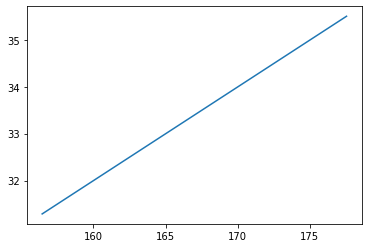

[[17.269788]]


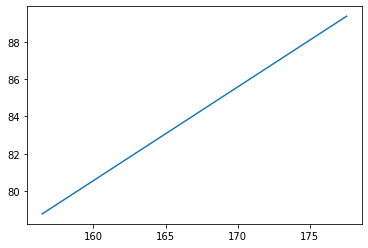

[[17.2693882]]


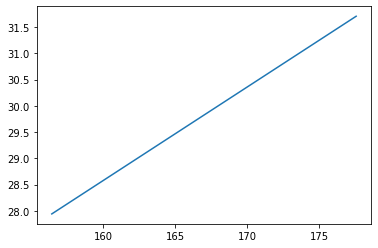

[[11.44504298]]


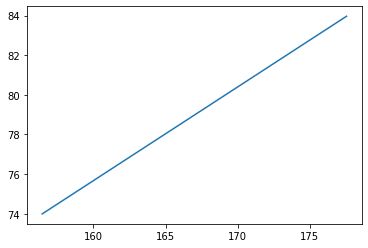

[[17.2693882]]


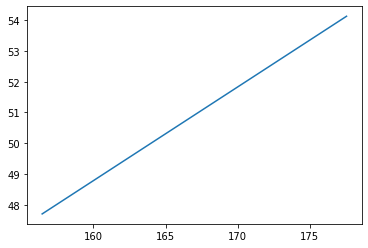

[[17.269788]]


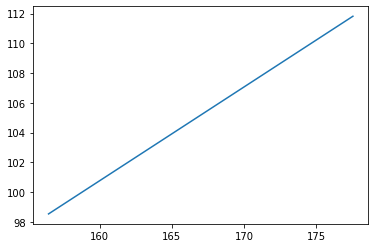

[[17.2693882]]


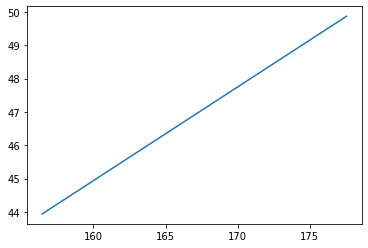

[[17.269788]]


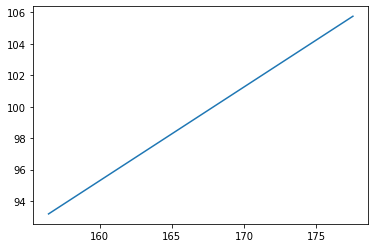

[[17.2693882]]


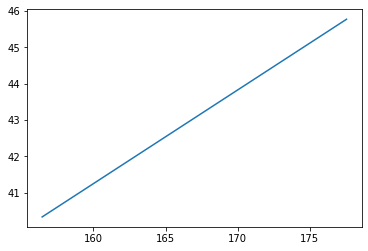

[[17.269788]]


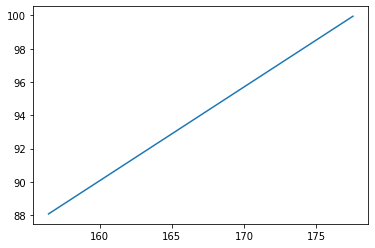

[[17.2693882]]


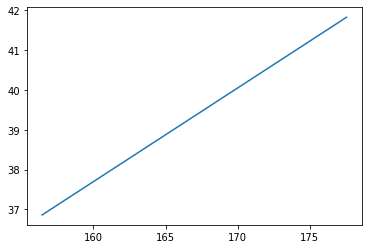

[[17.269788]]


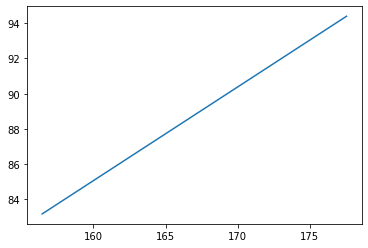

[[17.2693882]]


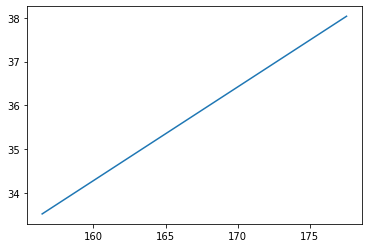

[[17.269788]]


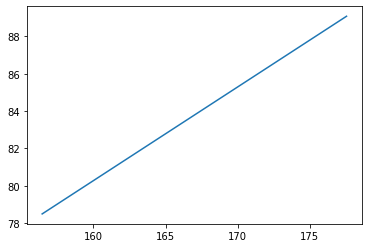

[[17.2693882]]


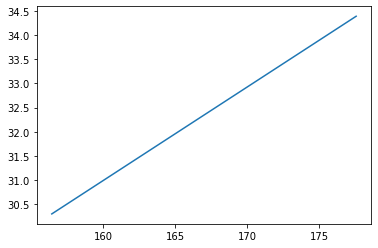

[[11.61508277]]


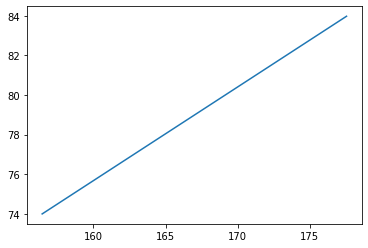

[[17.2693882]]


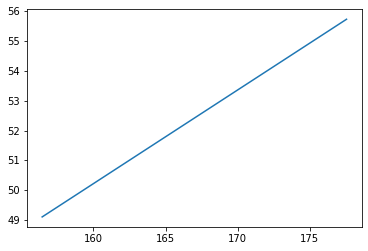

[[17.269788]]


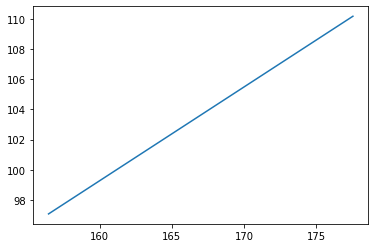

[[17.2693882]]


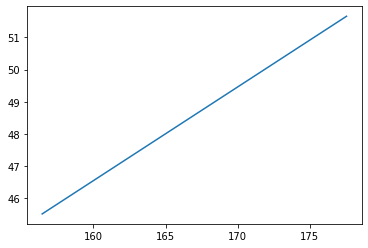

[[17.269788]]


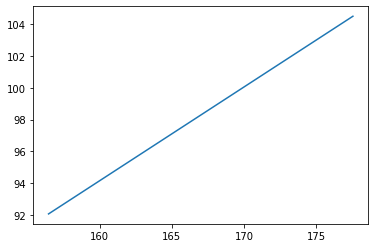

[[17.2693882]]


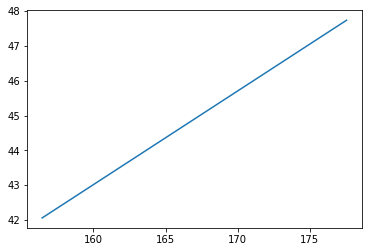

[[17.269788]]


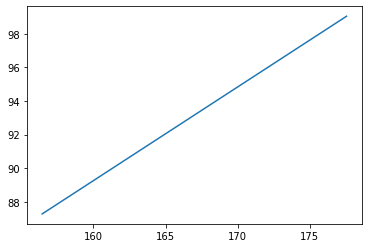

[[17.2693882]]


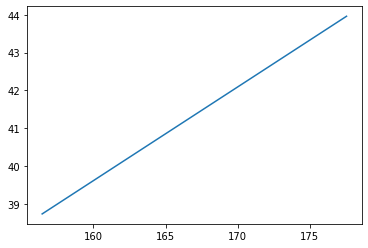

[[17.269788]]


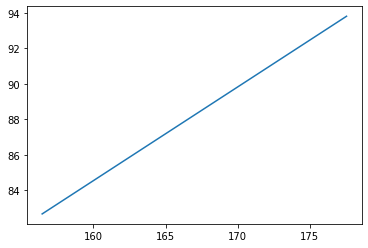

[[17.2693882]]


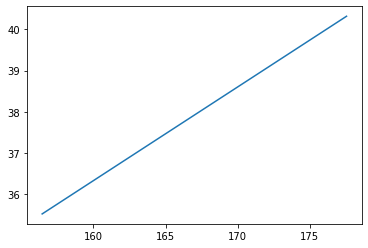

[[17.269788]]


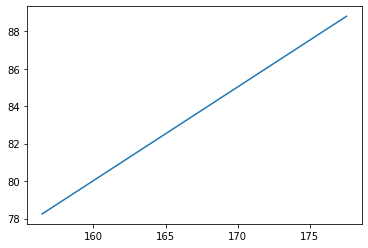

[[17.2693882]]


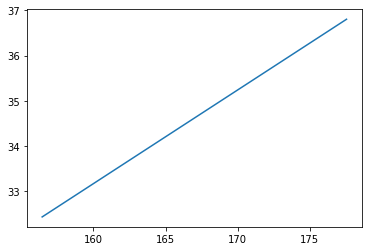

[[11.7851734]]


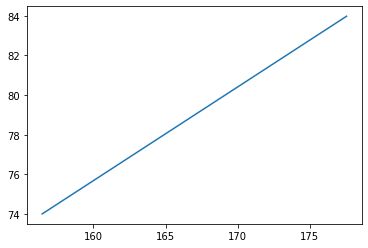

[[17.2693882]]


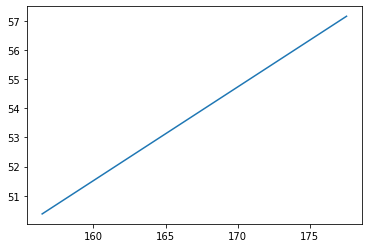

[[17.269788]]


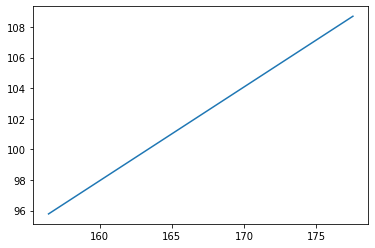

[[17.2693882]]


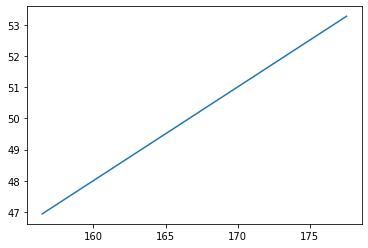

[[17.269788]]


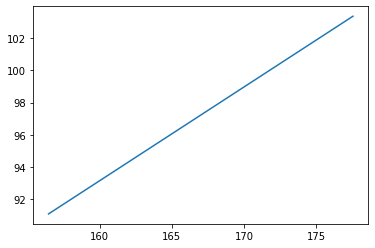

[[17.2693882]]


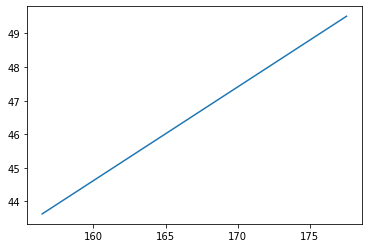

[[17.269788]]


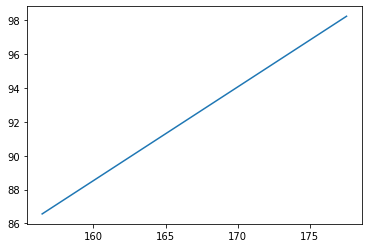

[[17.2693882]]


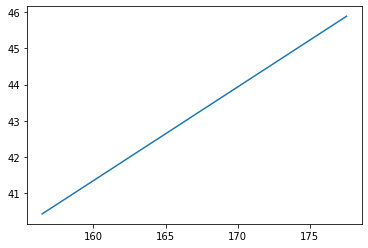

[[17.269788]]


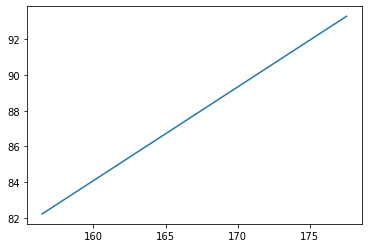

[[17.2693882]]


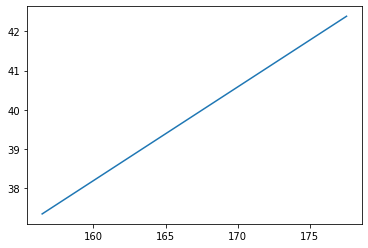

[[17.269788]]


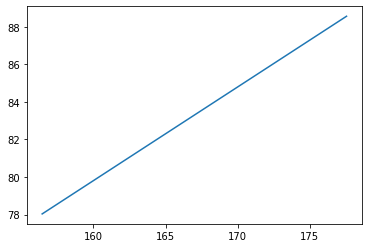

[[17.2693882]]


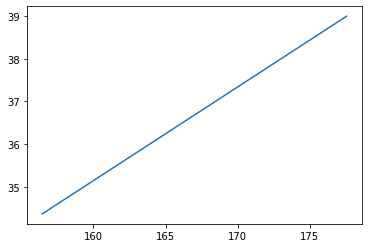

[[11.95559967]]


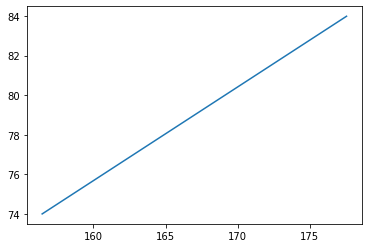

[[17.2693882]]


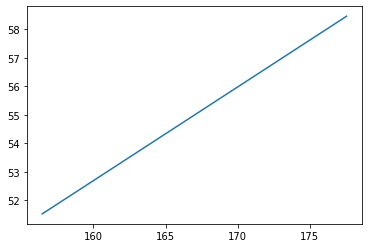

[[17.269788]]


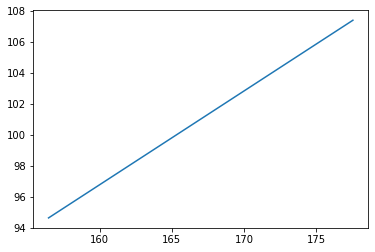

[[17.2693882]]


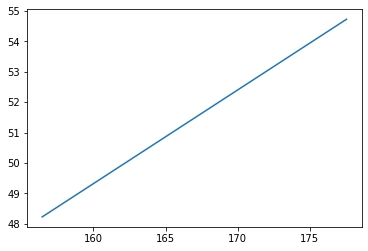

[[17.269788]]


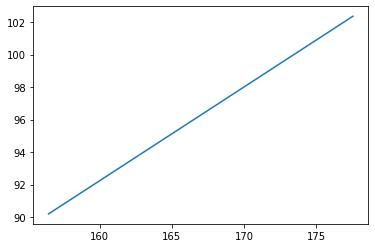

[[17.2693882]]


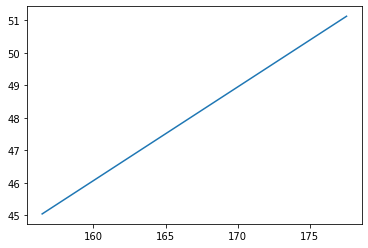

[[17.269788]]


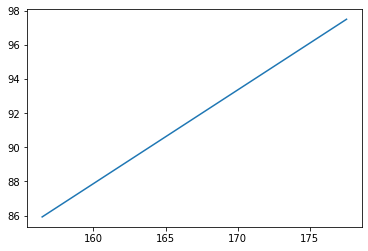

[[17.2693882]]


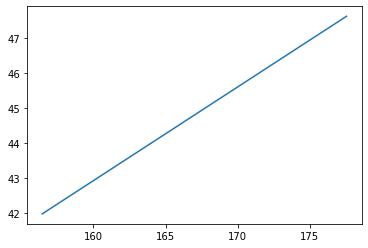

[[17.269788]]


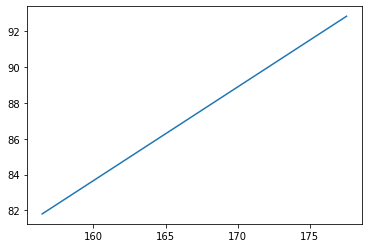

[[17.2693882]]


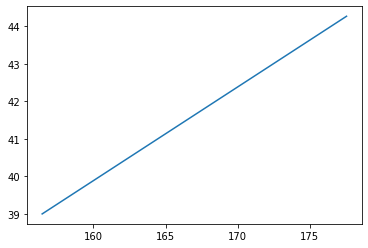

[[17.269788]]


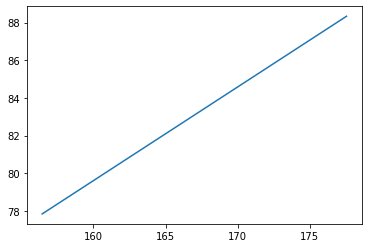

[[17.2693882]]


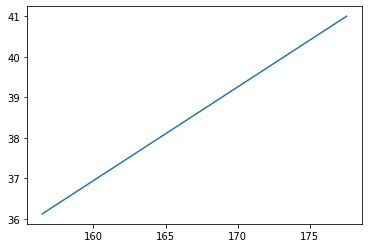

[[12.08881162]]


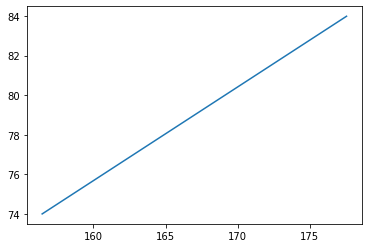

[[17.2693882]]


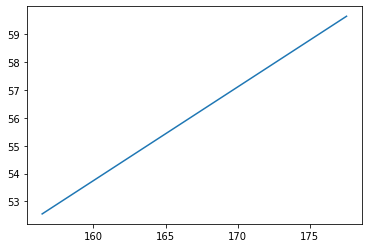

[[17.269788]]


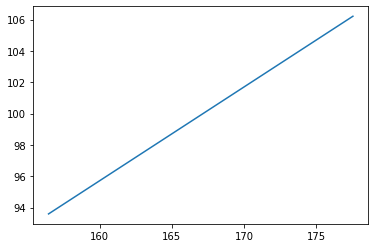

[[17.2693882]]


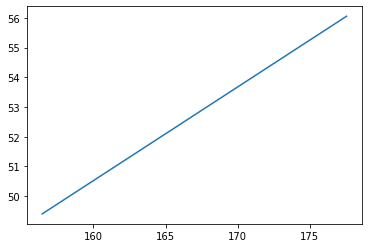

[[17.269788]]


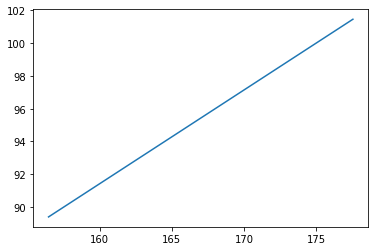

[[17.2693882]]


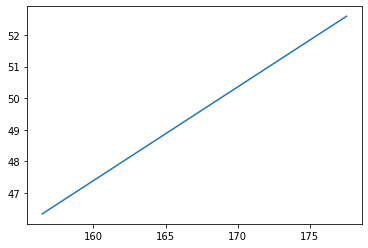

[[17.269788]]


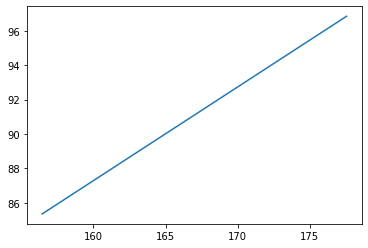

[[17.2693882]]


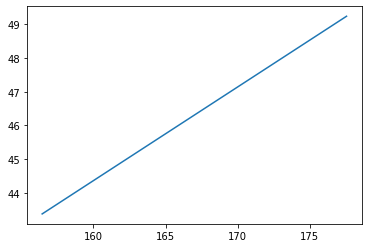

[[17.269788]]


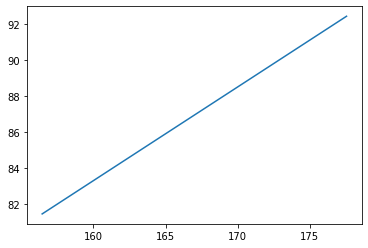

[[17.2693882]]


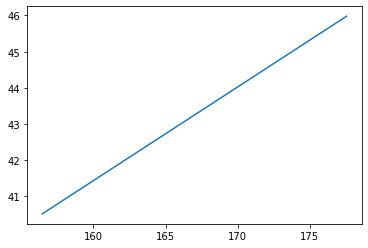

[[17.07180028]]


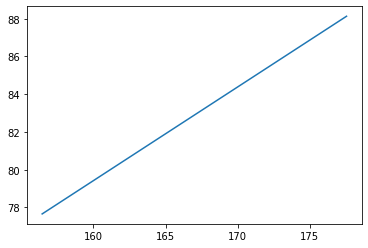

[[17.2693882]]


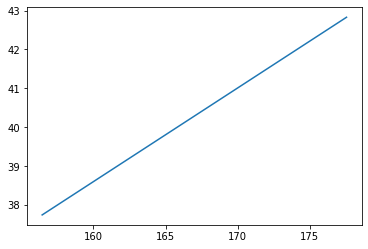

[[12.08881162]]


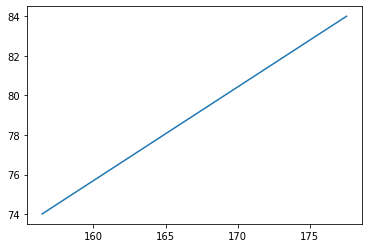

[[17.2693882]]


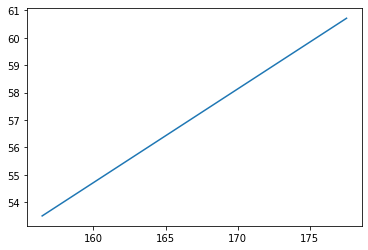

[[17.269788]]


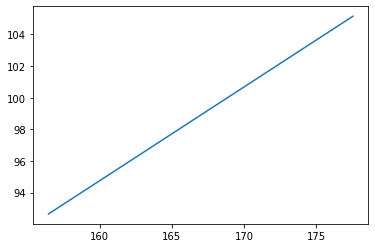

[[17.2693882]]


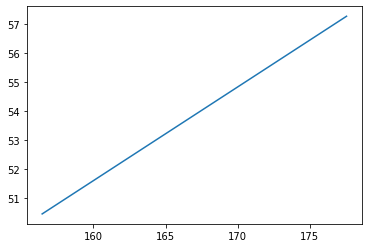

[[17.269788]]


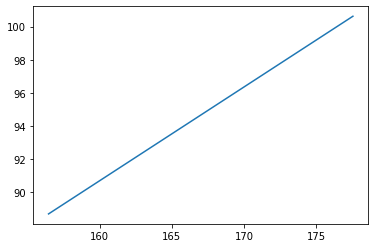

[[17.2693882]]


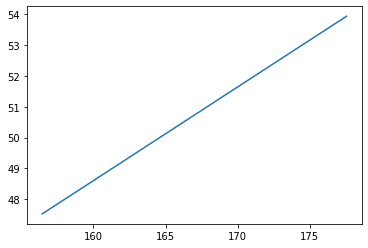

[[17.269788]]


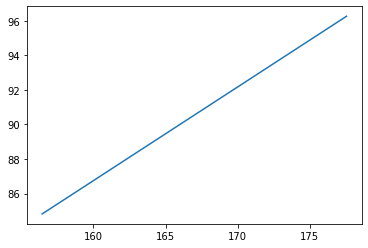

[[17.2693882]]


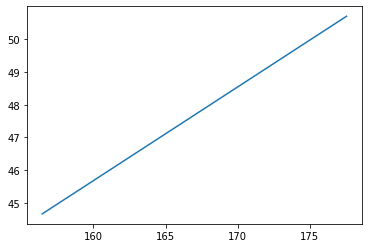

[[17.269788]]


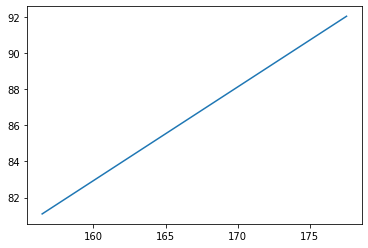

[[17.2693882]]


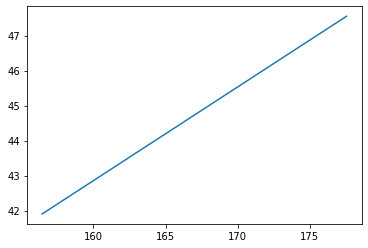

[[16.07250129]]


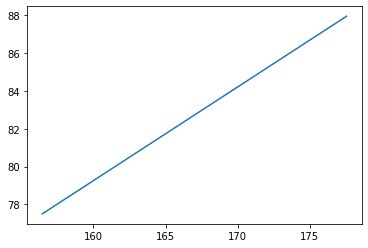

[[17.2693882]]


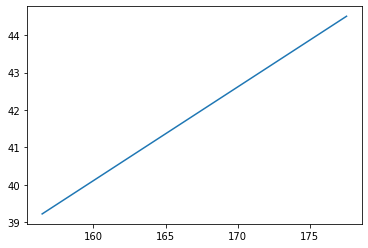

[[12.08881162]]


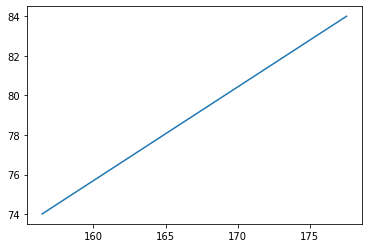

[[17.2693882]]


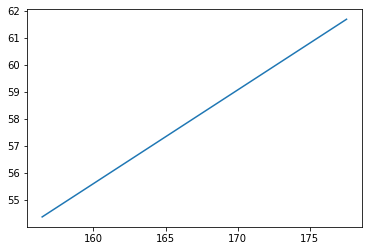

[[17.269788]]


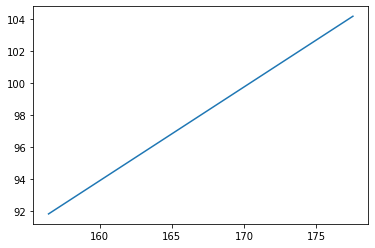

[[17.2693882]]


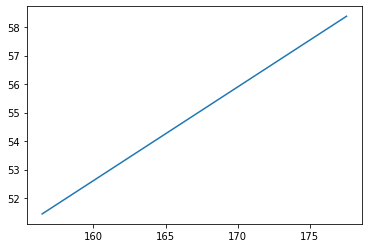

[[17.269788]]


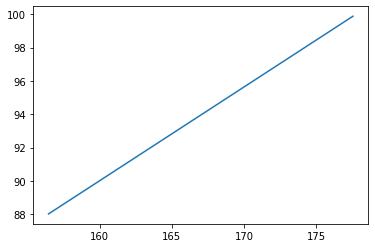

[[17.2693882]]


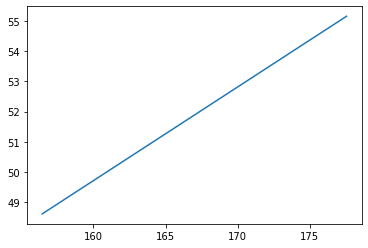

[[17.269788]]


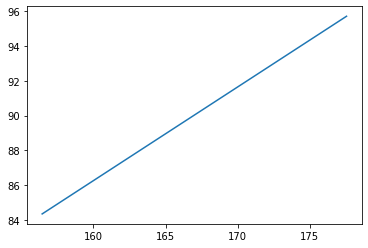

[[17.2693882]]


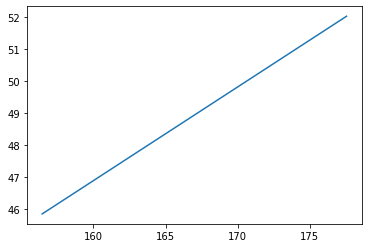

[[17.269788]]


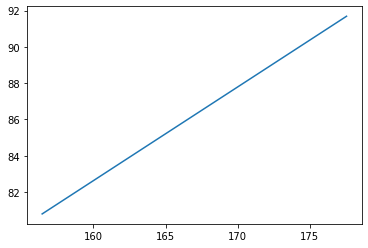

[[17.2693882]]


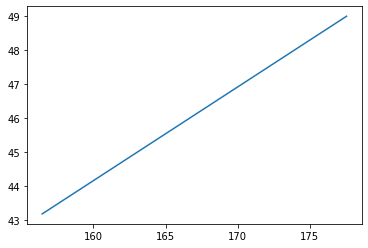

[[15.54281343]]


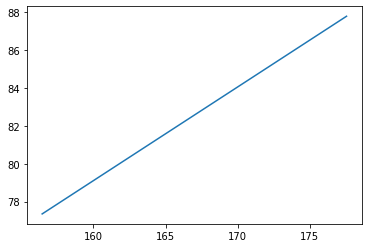

[[17.2693882]]


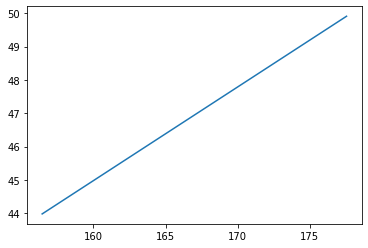

[[17.269788]]


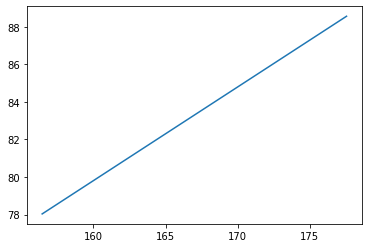

[[17.2693882]]


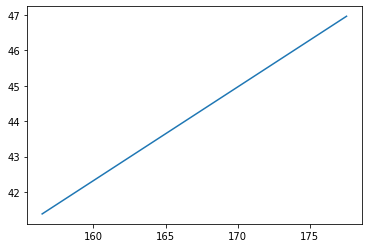

[[10.3618748]]


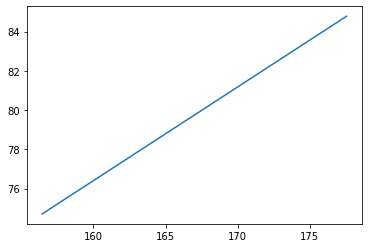

[[17.2693882]]


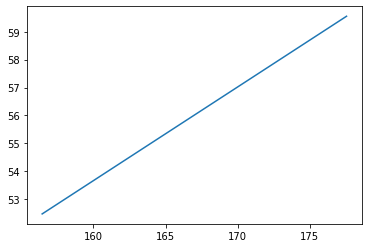

[[17.269788]]


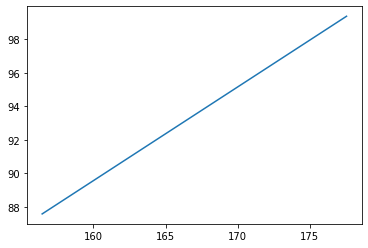

[[17.2693882]]


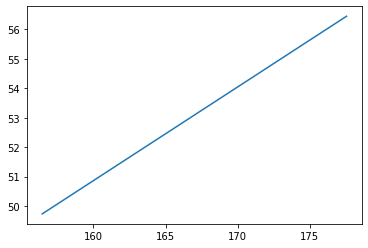

[[17.269788]]


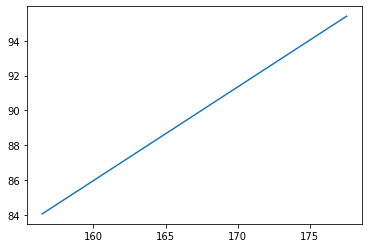

[[17.2693882]]


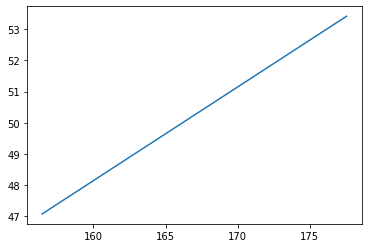

[[17.269788]]


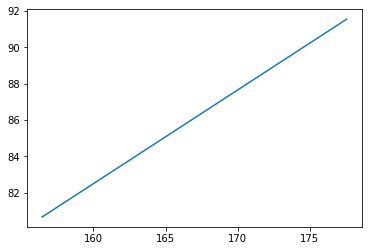

[[17.2693882]]


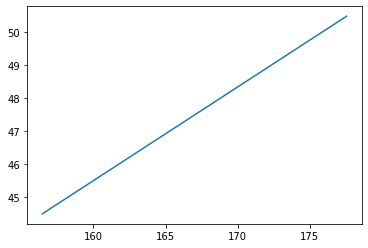

[[15.54283575]]


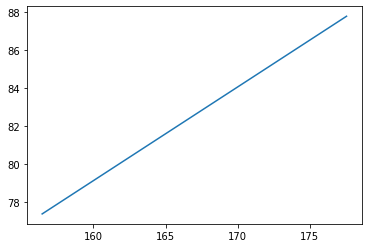

[[17.2693882]]


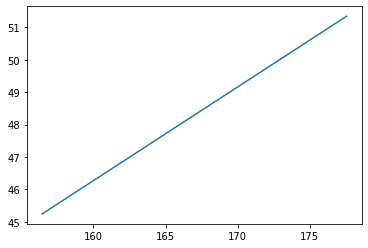

[[17.269788]]


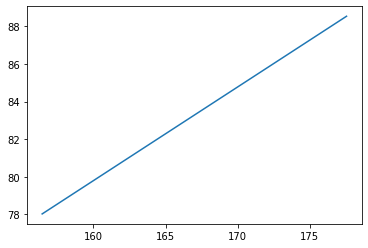

[[17.2693882]]


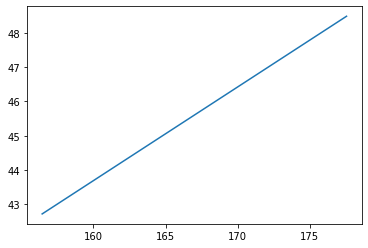

[[10.71527547]]


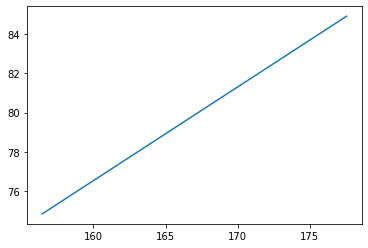

[[17.2693882]]


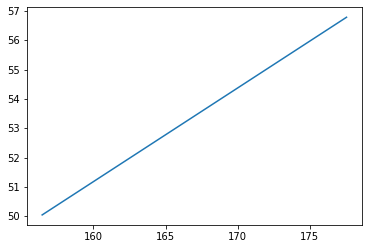

[[17.269788]]


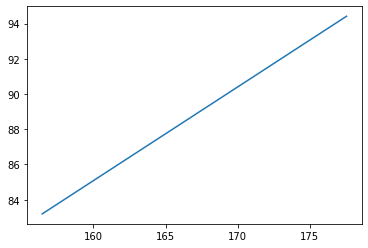

[[17.2693882]]


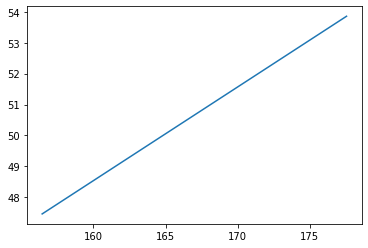

[[17.269788]]


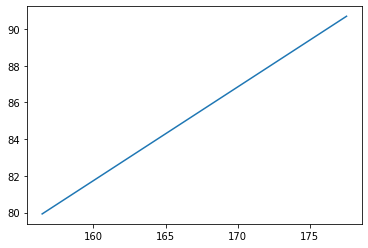

[[17.2693882]]


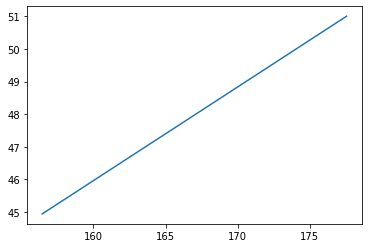

[[13.8158304]]


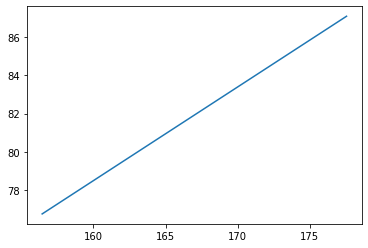

[[17.2693882]]


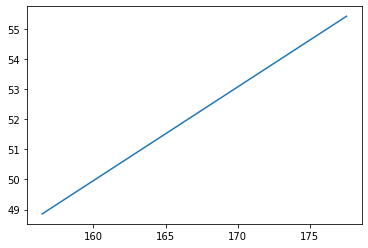

[[17.269788]]


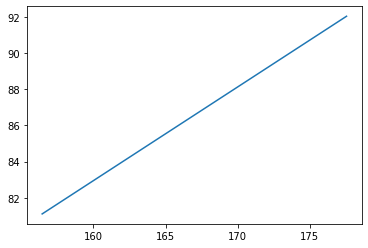

[[17.2693882]]


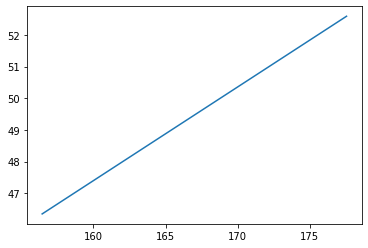

[[17.269788]]


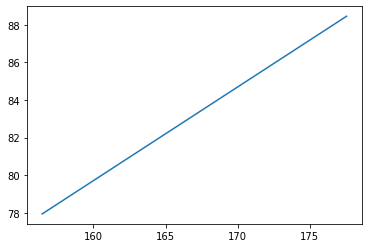

[[17.2693882]]


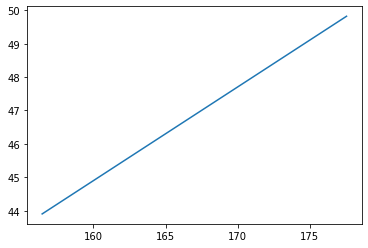

[[11.03537017]]


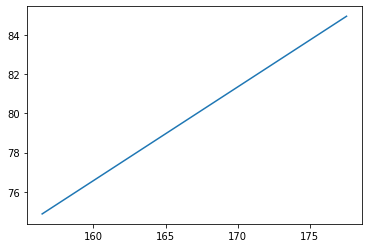

[[17.2693882]]


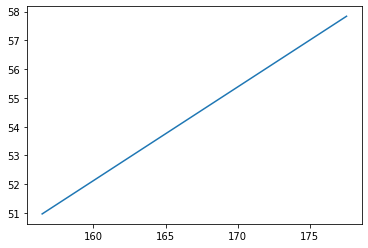

[[17.269788]]


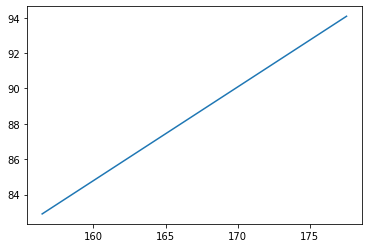

[[17.2693882]]


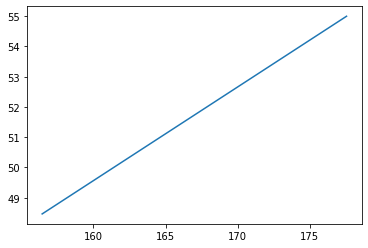

[[17.269788]]


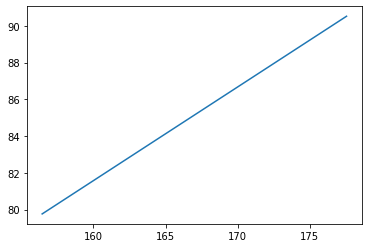

[[17.2693882]]


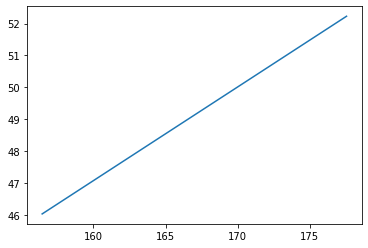

[[13.8158304]]


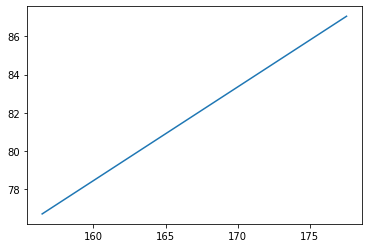

[[17.2693882]]


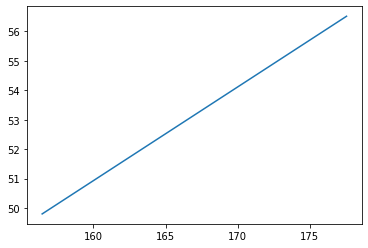

[[17.269788]]


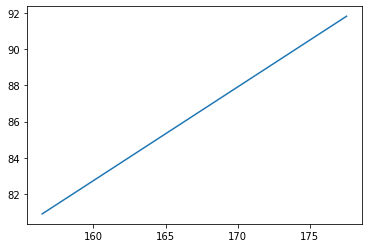

[[17.2693882]]


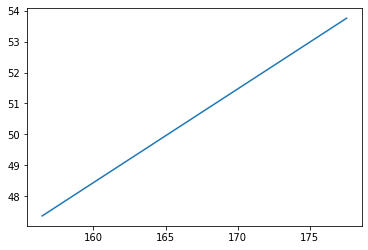

[[17.269788]]


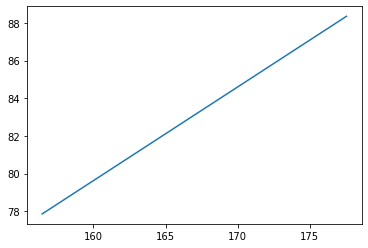

[[17.2693882]]


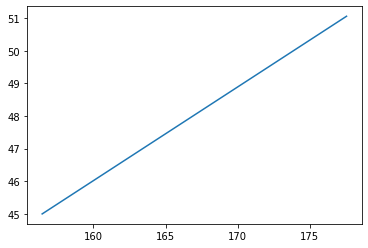

[[11.33144002]]


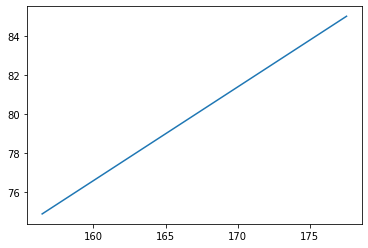

[[17.2693882]]


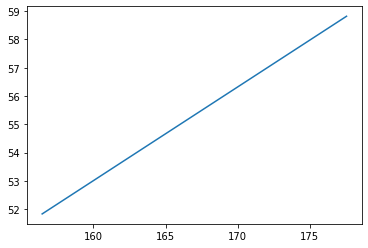

[[17.269788]]


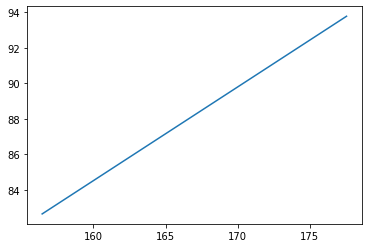

[[17.2693882]]


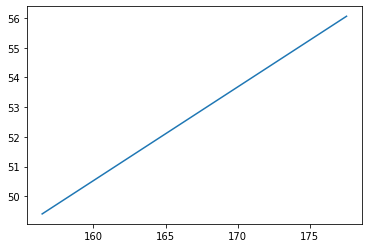

[[17.269788]]


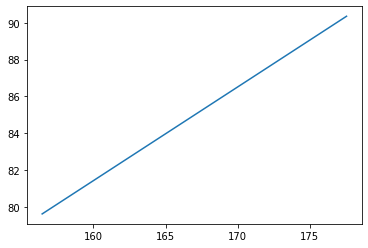

[[17.2693882]]


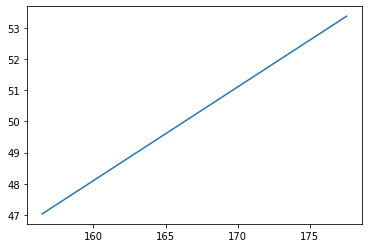

[[13.8158304]]


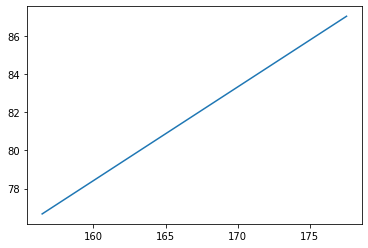

[[17.2693882]]


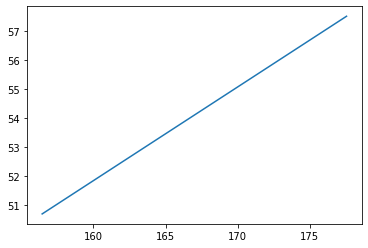

[[17.269788]]


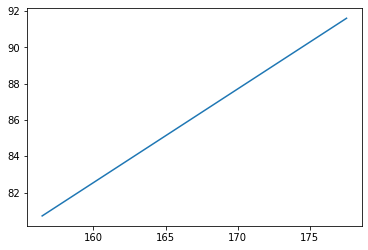

[[17.2693882]]


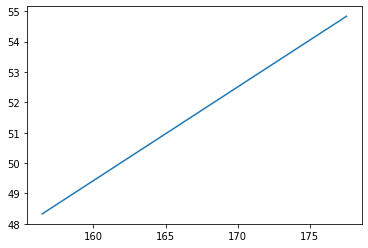

[[17.269788]]


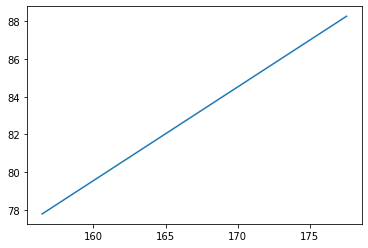

[[17.2693882]]


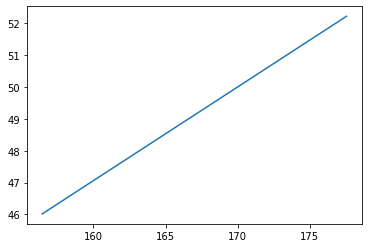

[[11.62746988]]


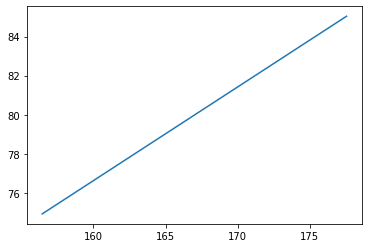

[[17.2693882]]


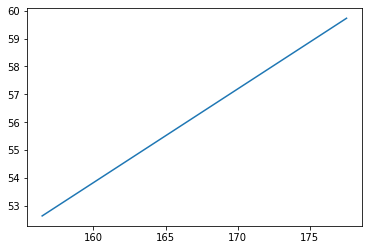

[[17.269788]]


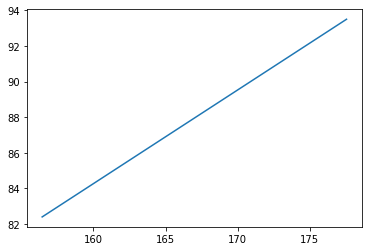

[[17.2693882]]


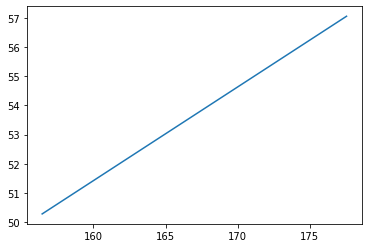

[[17.269788]]


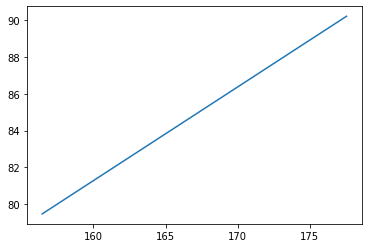

[[17.2693882]]


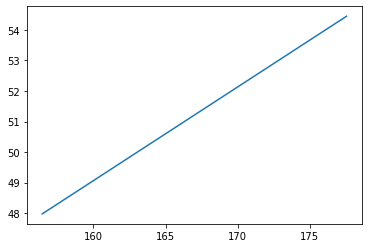

[[13.8158304]]


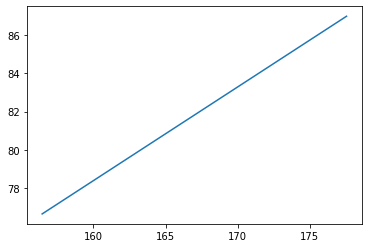

[[17.2693882]]


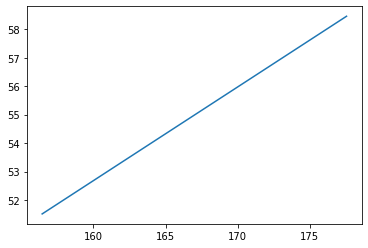

[[17.269788]]


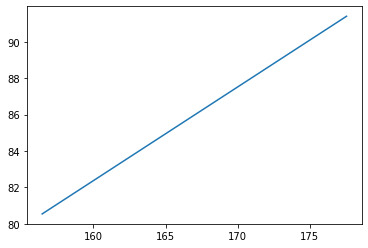

[[17.2693882]]


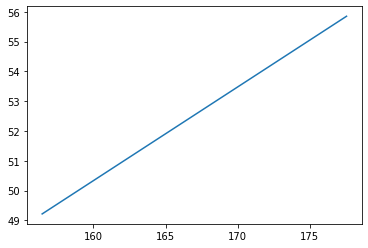

[[17.269788]]


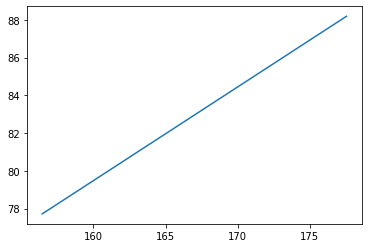

[[17.2693882]]


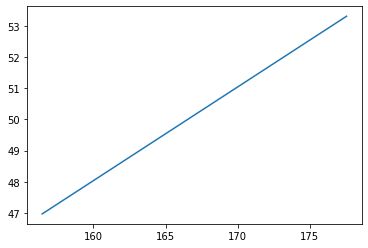

[[11.92344625]]


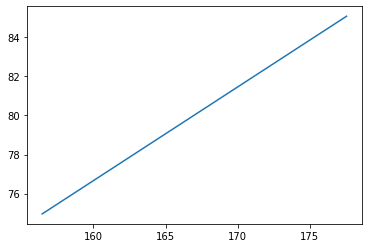

[[17.2693882]]


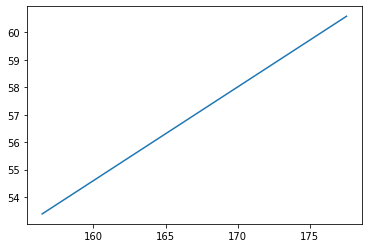

[[17.269788]]


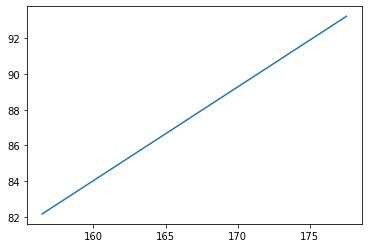

[[17.2693882]]


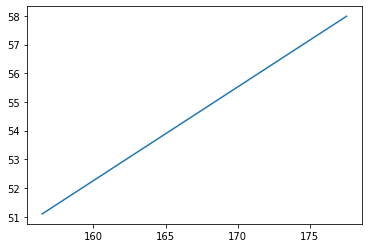

[[17.269788]]


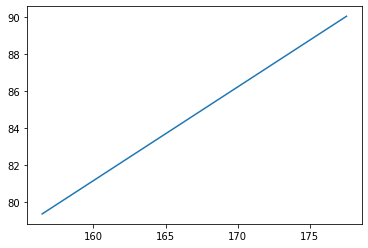

[[17.2693882]]


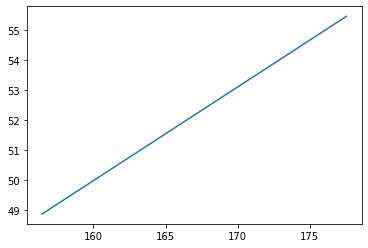

[[13.8158304]]


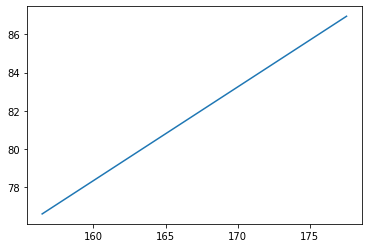

[[17.2693882]]


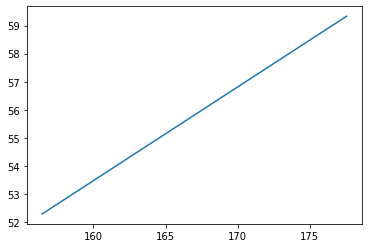

[[17.269788]]


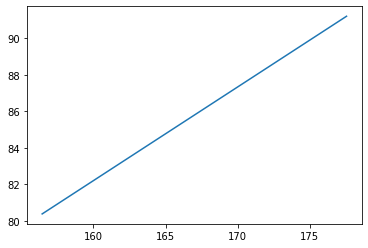

[[17.2693882]]


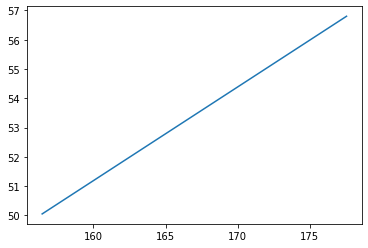

[[17.269788]]


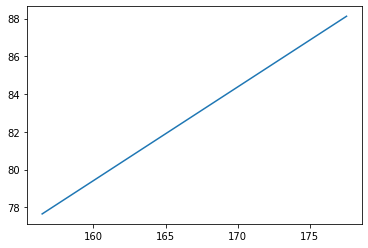

[[17.2693882]]


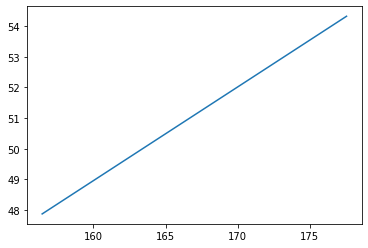

[[12.0888516]]


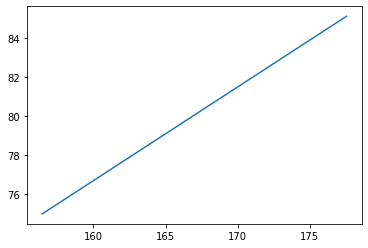

[[17.2693882]]


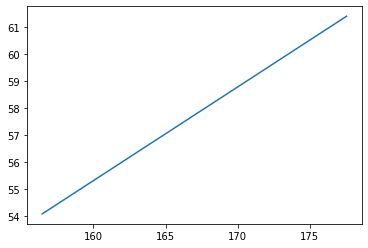

[[17.269788]]


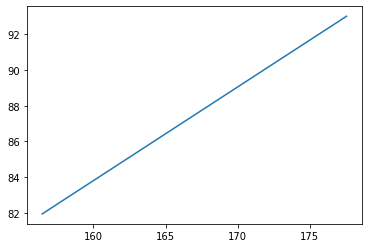

[[17.2693882]]


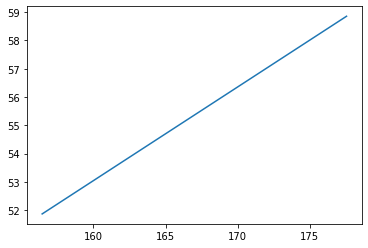

[[17.269788]]


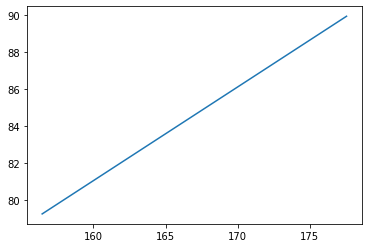

[[17.2693882]]


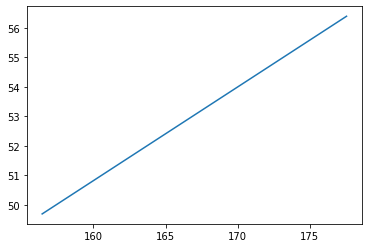

[[13.8158304]]


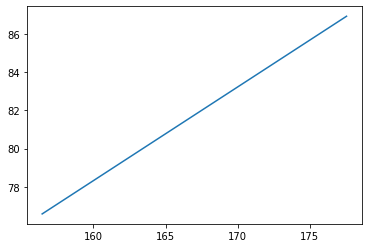

[[17.2693882]]


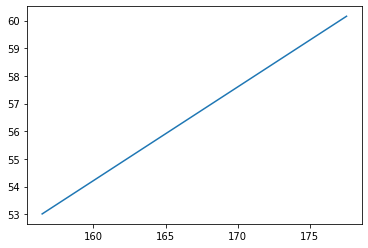

[[17.269788]]


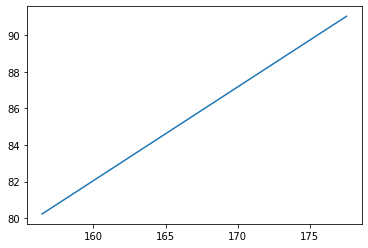

[[17.2693882]]


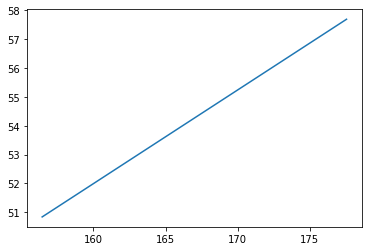

[[17.08820194]]


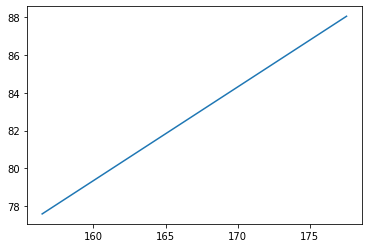

[[17.2693882]]


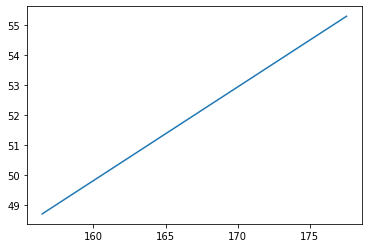

[[12.0888516]]


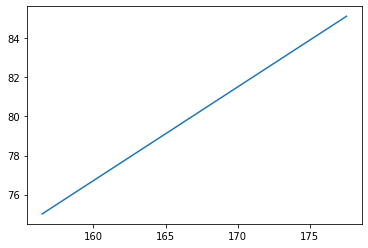

[[17.2693882]]


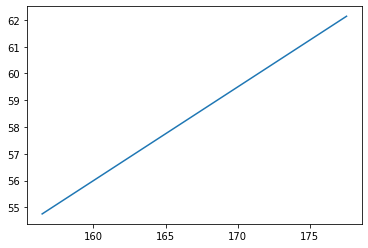

[[17.269788]]


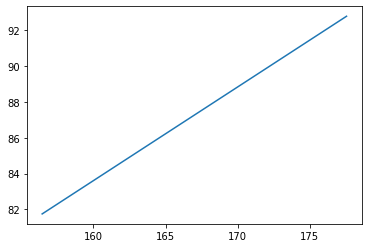

[[17.2693882]]


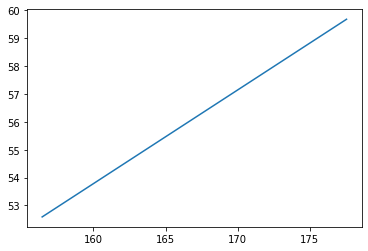

[[17.269788]]


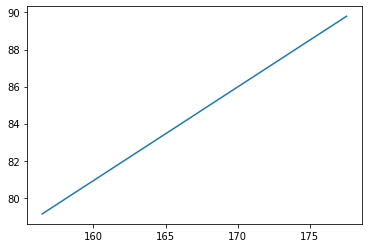

[[17.2693882]]


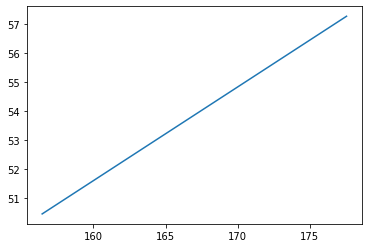

[[13.8158304]]


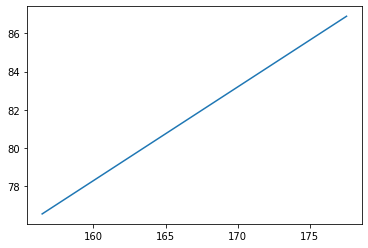

[[17.2693882]]


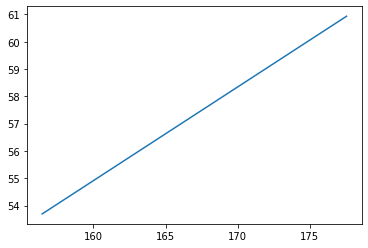

[[17.269788]]


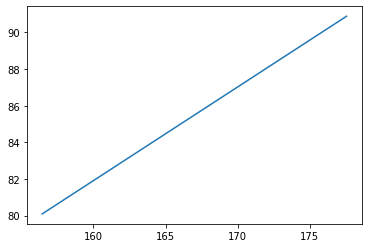

[[17.2693882]]


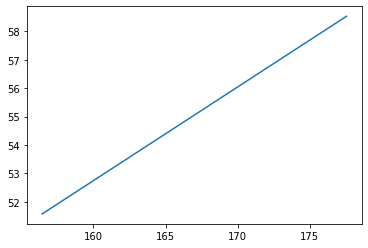

[[16.60784828]]


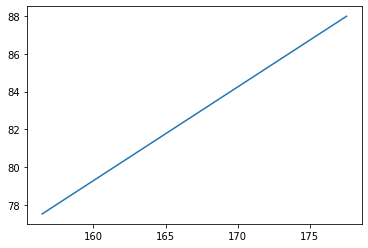

[[17.2693882]]


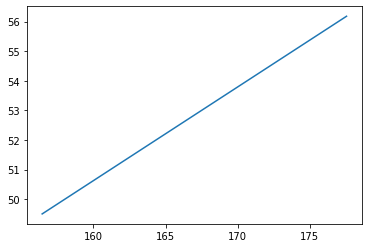

[[12.0888516]]


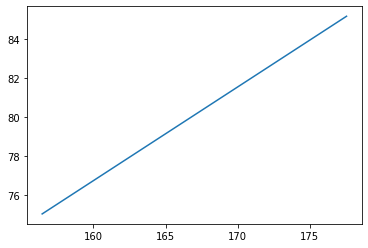

[[17.2693882]]


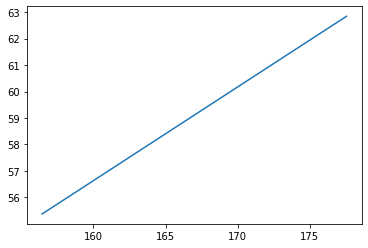

[[17.269788]]


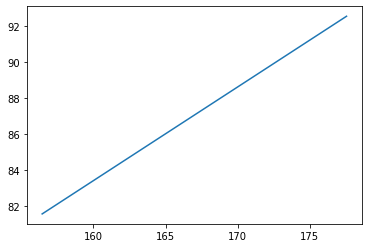

[[17.2693882]]


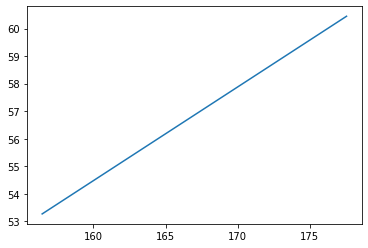

[[17.269788]]


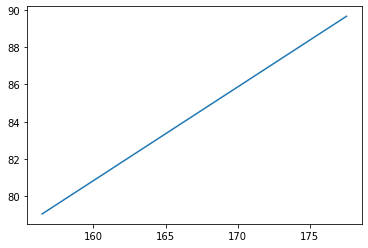

[[17.2693882]]


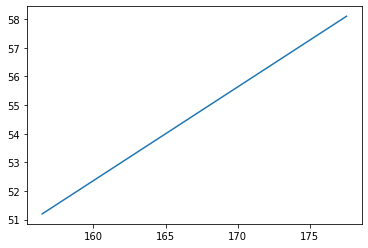

[[13.8158304]]


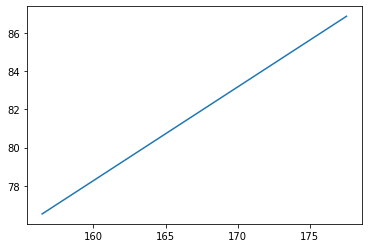

[[17.2693882]]


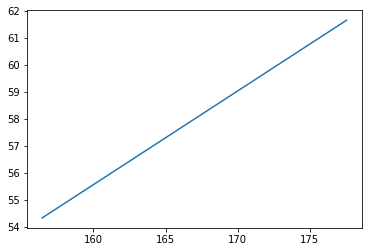

[[17.269788]]


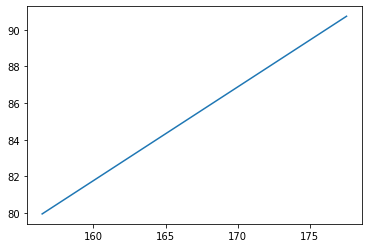

[[17.2693882]]


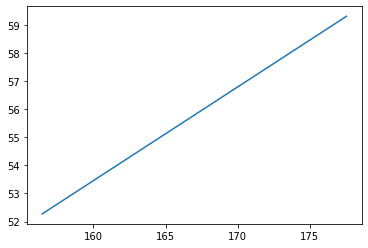

[[16.12739506]]


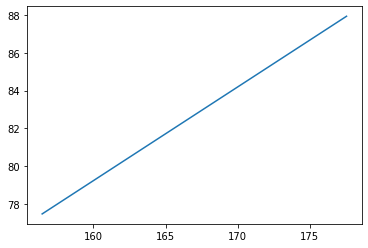

[[17.2693882]]


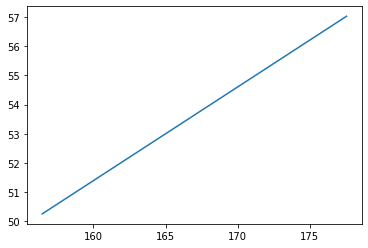

[[12.0888516]]


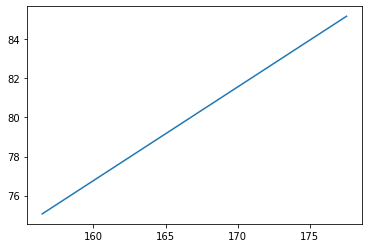

[[17.2693882]]


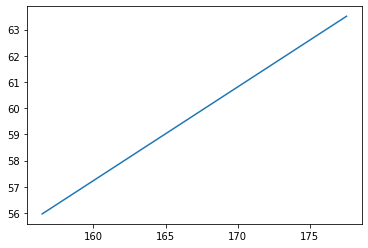

[[17.269788]]


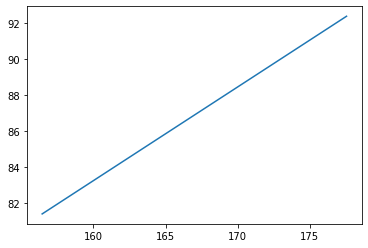

[[17.2693882]]


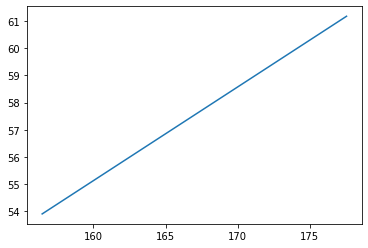

[[17.269788]]


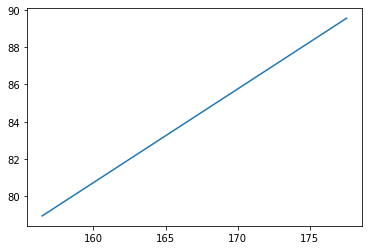

[[17.2693882]]


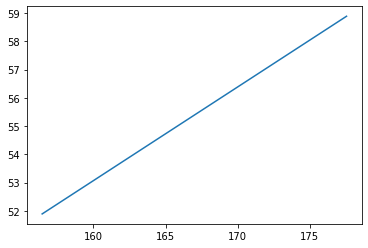

[[13.8158304]]


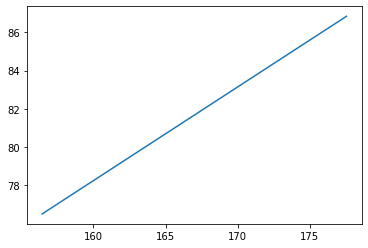

[[17.2693882]]


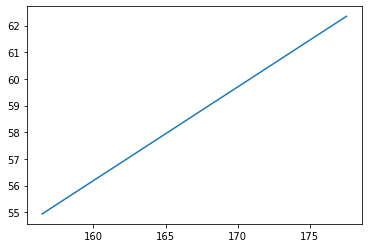

[[17.269788]]


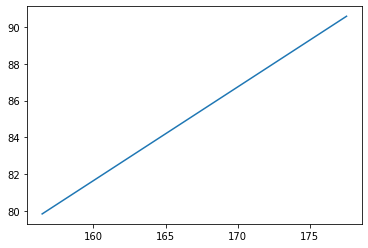

[[17.2693882]]


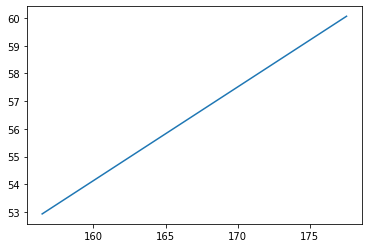

[[15.65302324]]


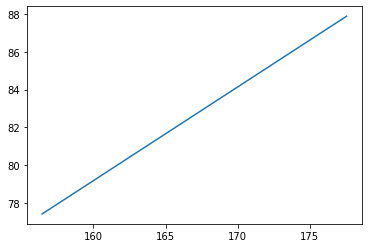

[[17.2693882]]


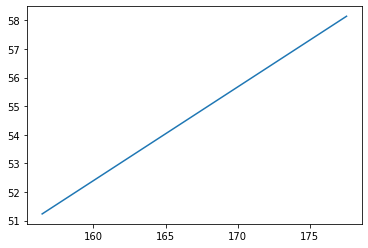

[[12.0888516]]


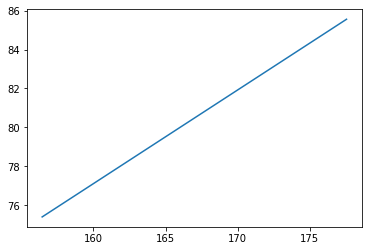

[[17.2693882]]


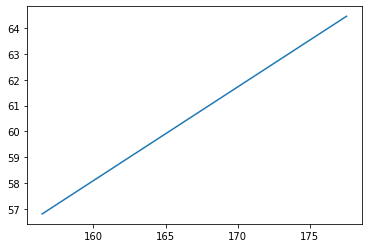

[[17.269788]]


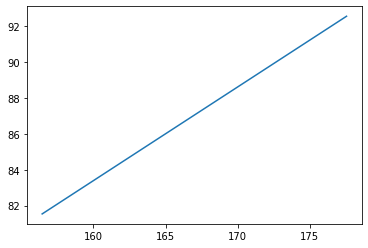

[[17.2693882]]


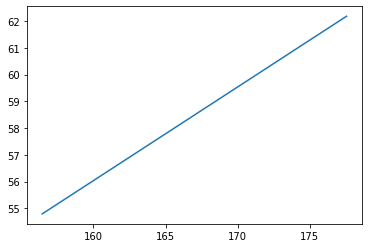

[[17.269788]]


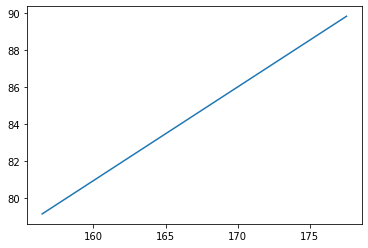

[[17.2693882]]


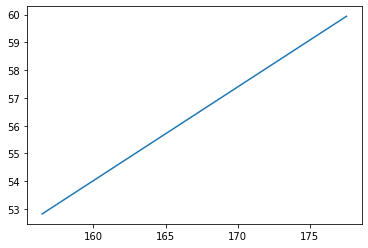

[[13.8158304]]


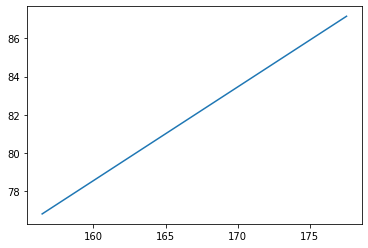

[[17.2693882]]


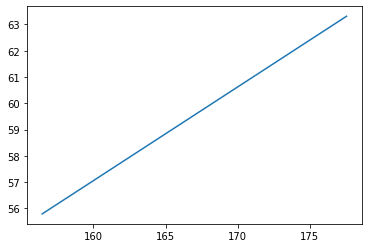

[[17.269788]]


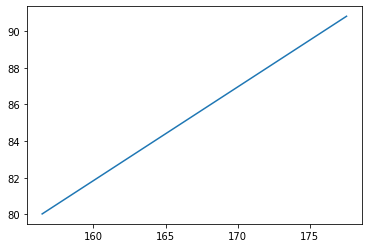

[[17.2693882]]


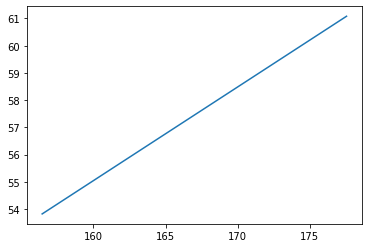

[[17.269788]]


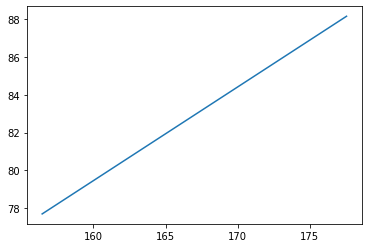

[[17.2693882]]


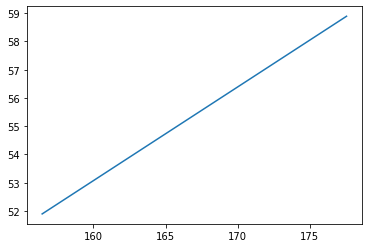

[[12.0888516]]


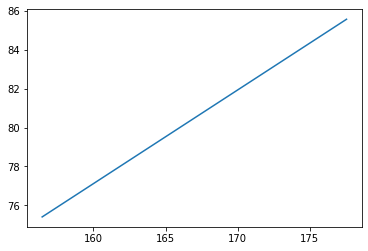

[[17.2693882]]


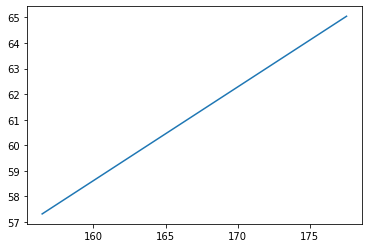

[[17.269788]]


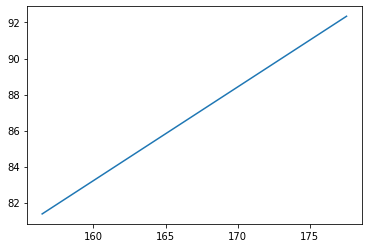

[[17.2693882]]


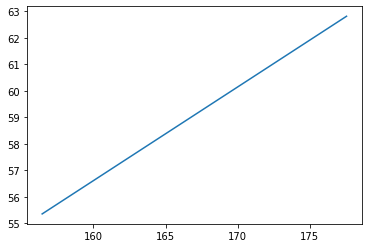

[[17.269788]]


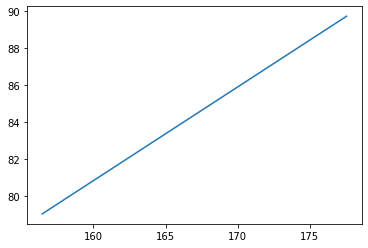

[[17.2693882]]


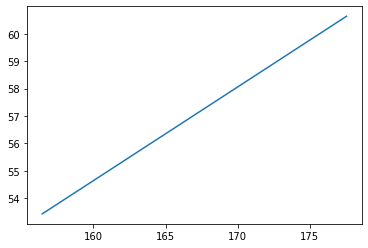

[[13.8158304]]


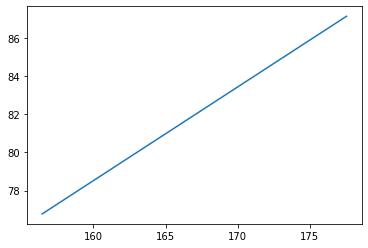

[[17.2693882]]


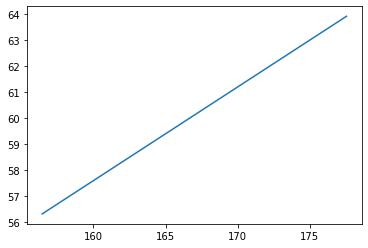

[[17.269788]]


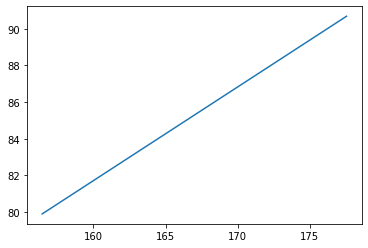

[[17.2693882]]


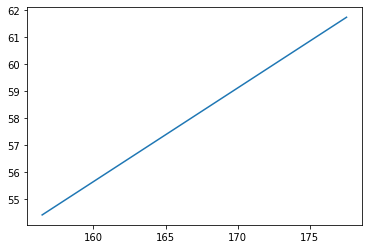

[[17.269788]]


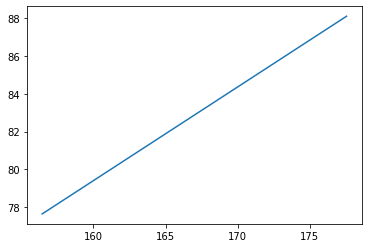

[[17.2693882]]


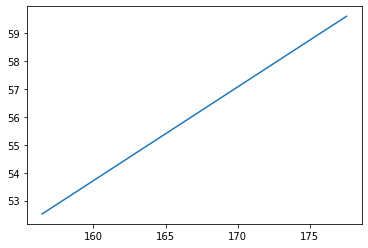

[[12.0888516]]


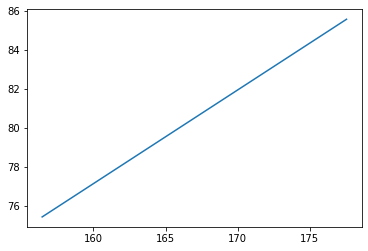

[[17.2693882]]


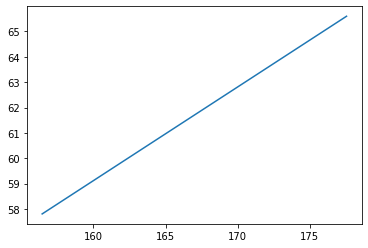

[[17.269788]]


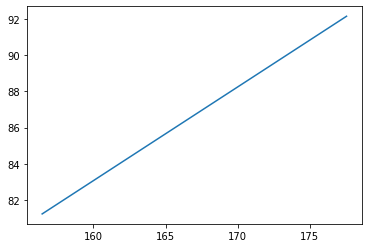

[[17.2693882]]


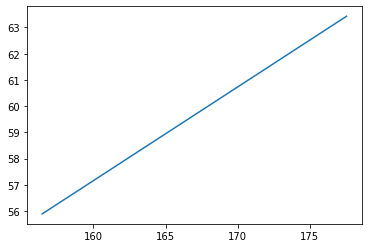

[[17.269788]]


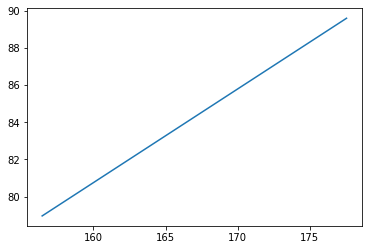

[[17.2693882]]


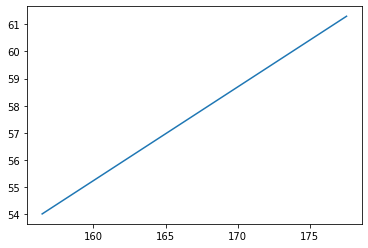

[[13.8158304]]


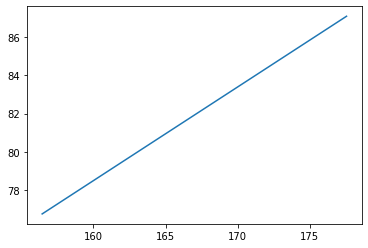

[[17.2693882]]


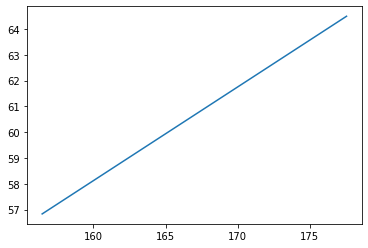

[[17.269788]]


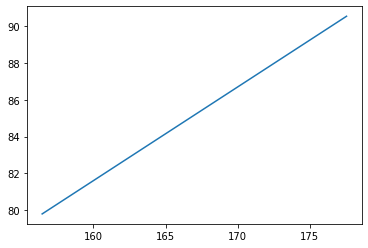

[[17.2693882]]


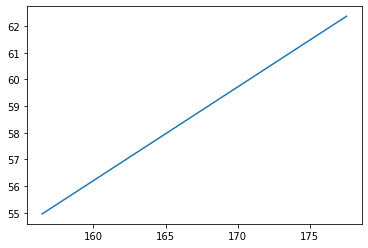

[[17.269788]]


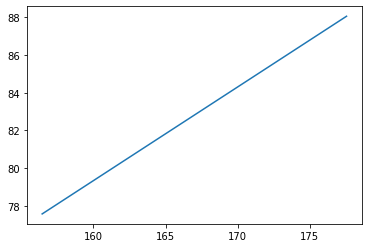

[[17.2693882]]


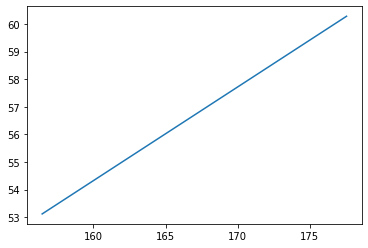

[[12.0888516]]


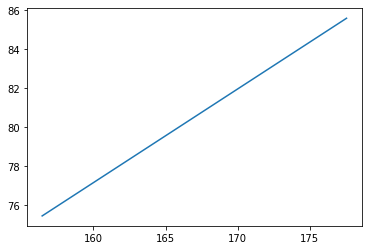

[[17.2693882]]


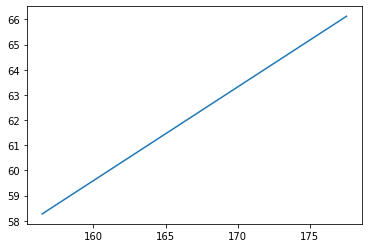

[[17.269788]]


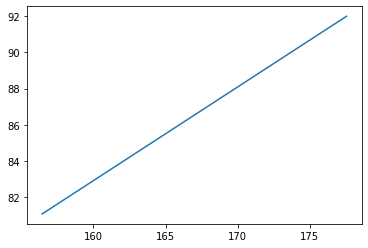

[[17.2693882]]


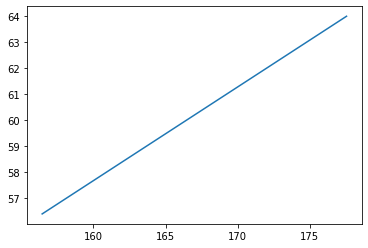

[[17.269788]]


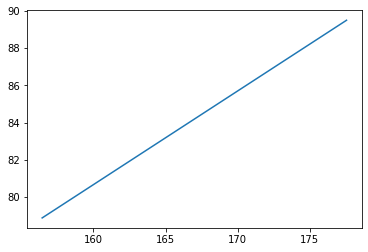

[[17.2693882]]


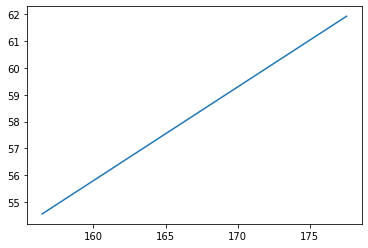

[[13.8158304]]


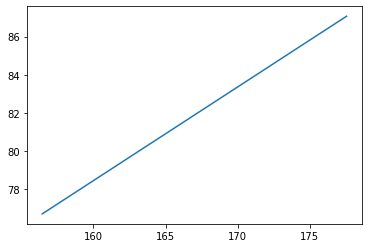

[[17.2693882]]


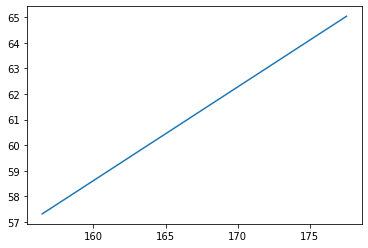

[[17.269788]]


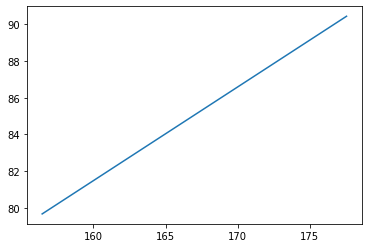

[[17.2693882]]


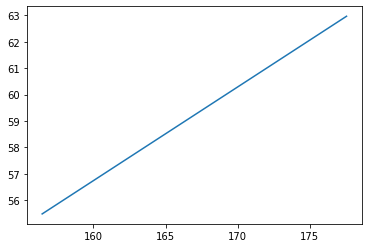

[[16.85250335]]


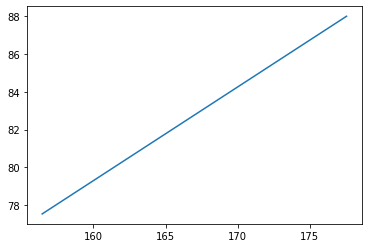

[[17.2693882]]


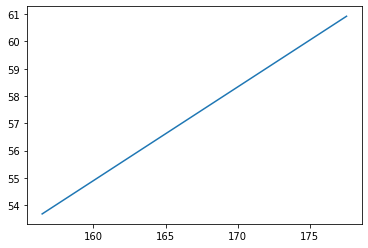

[[12.0888516]]


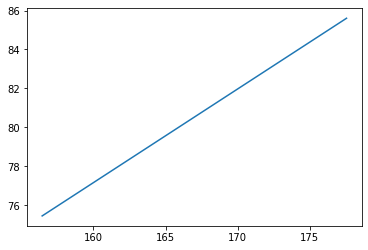

[[17.00425473]]


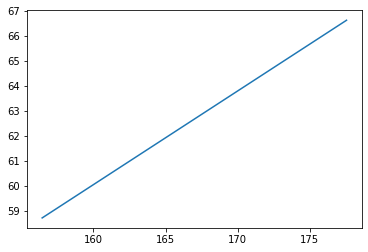

[[17.269788]]


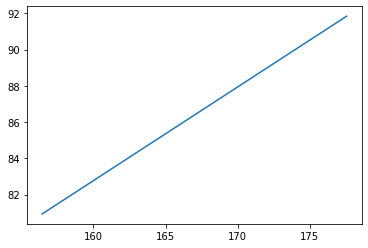

[[17.2693882]]


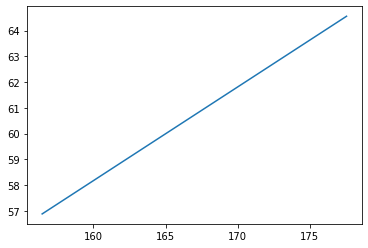

[[17.269788]]


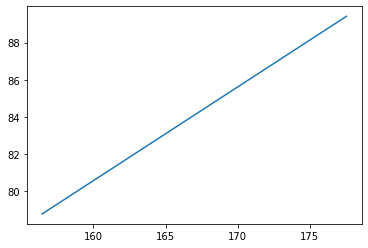

[[17.2693882]]


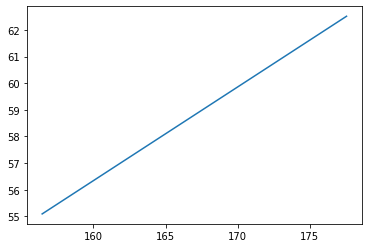

[[13.8158304]]


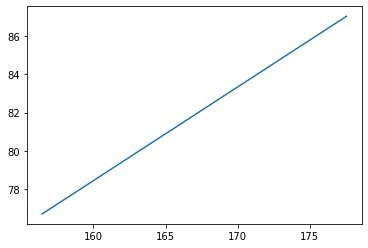

[[17.2693882]]


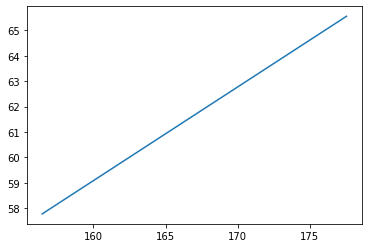

[[17.269788]]


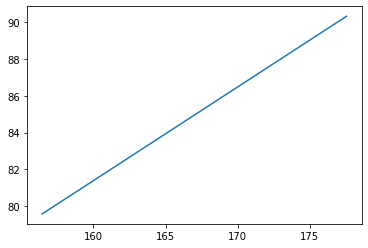

[[17.2693882]]


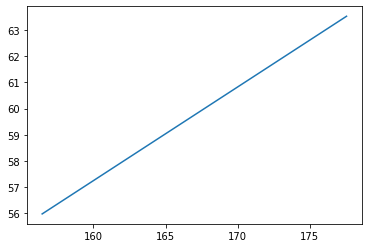

[[16.37204876]]


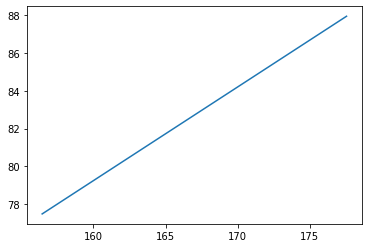

[[17.2693882]]


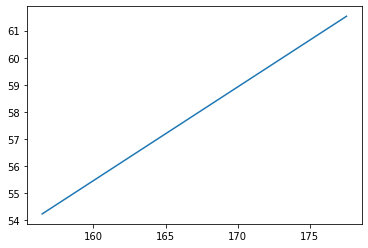

[[12.0888516]]


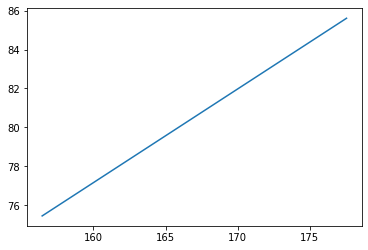

[[15.54244938]]


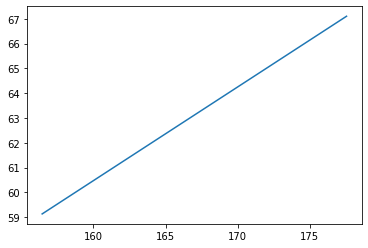

[[17.269788]]


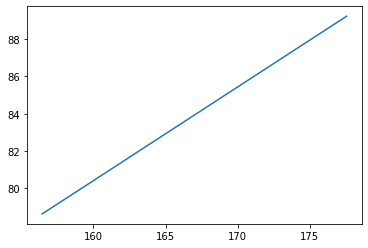

[[17.2693882]]


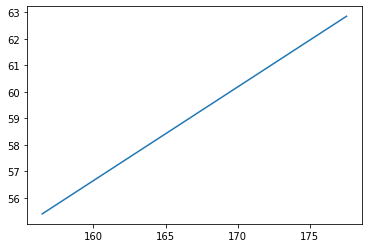

[[13.8158304]]


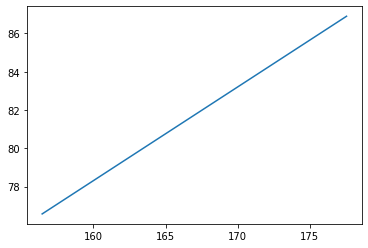

[[17.2693882]]


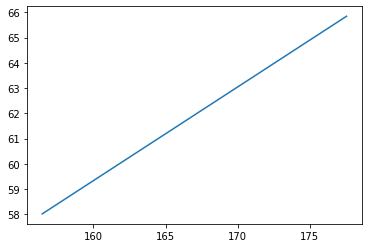

[[17.269788]]


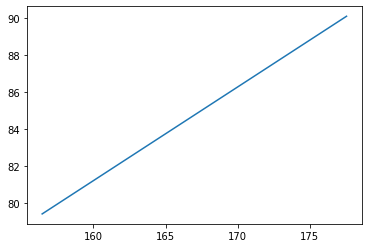

[[17.2693882]]


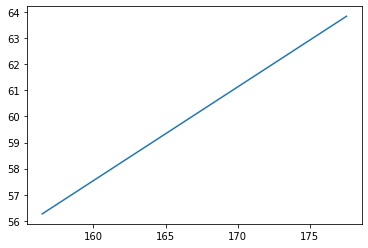

[[15.5428092]]


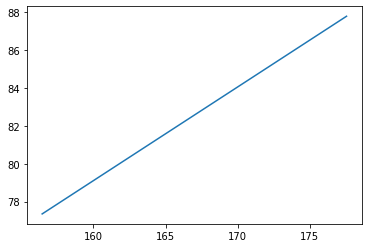

[[17.2693882]]


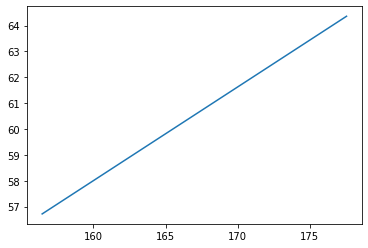

[[17.269788]]


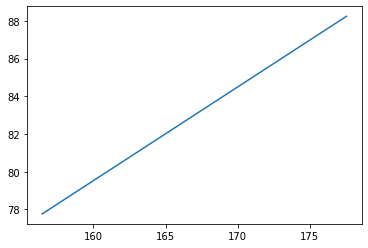

[[17.2693882]]


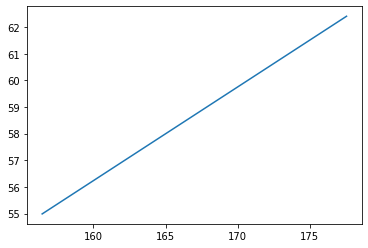

[[12.0888516]]


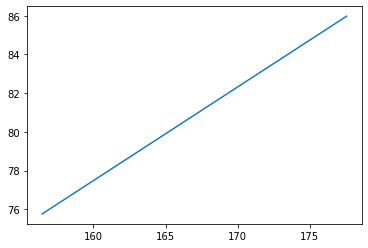

[[15.54244938]]


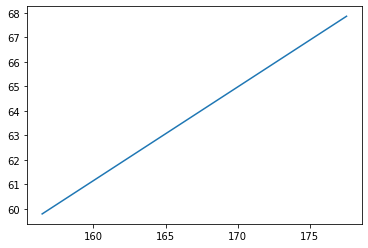

[[17.269788]]


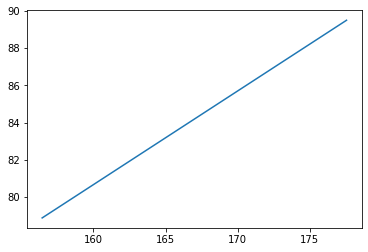

[[17.2693882]]


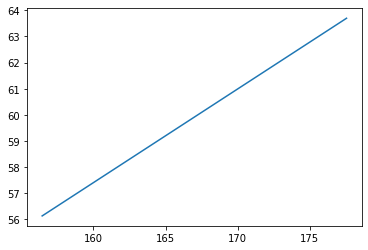

[[13.8158304]]


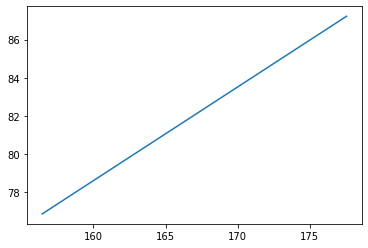

[[17.17053911]]


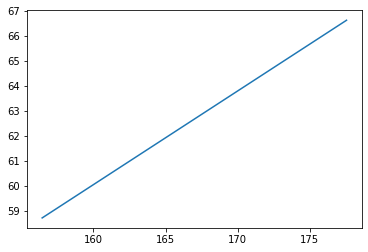

[[17.269788]]


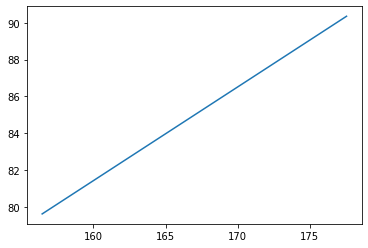

[[17.2693882]]


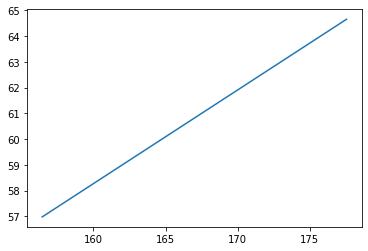

[[17.269788]]


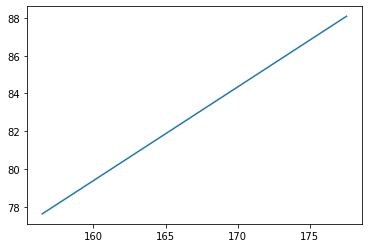

[[17.2693882]]


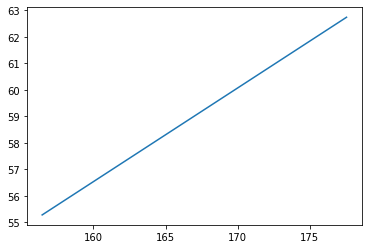

[[12.0888516]]


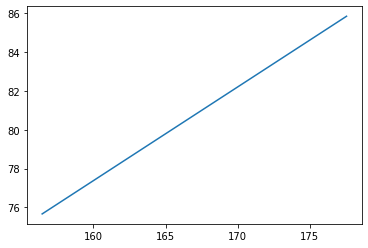

[[15.54244938]]


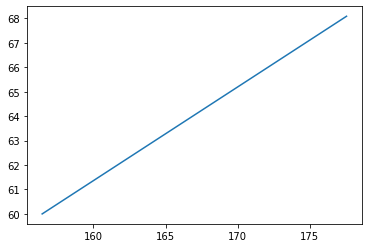

[[17.269788]]


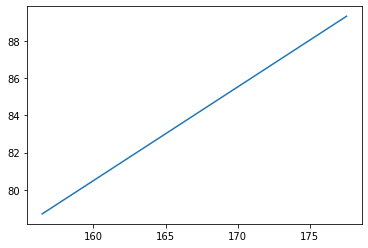

[[17.2693882]]


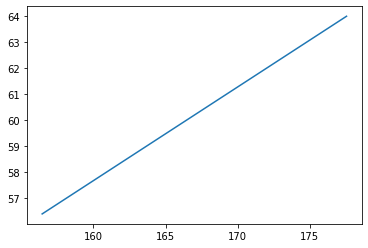

[[13.8158304]]


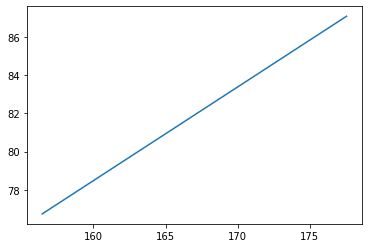

[[15.54244938]]


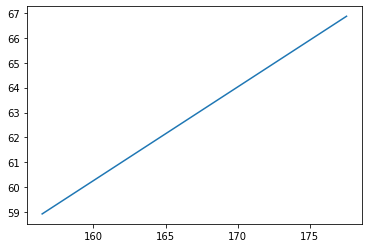

[[15.54285245]]


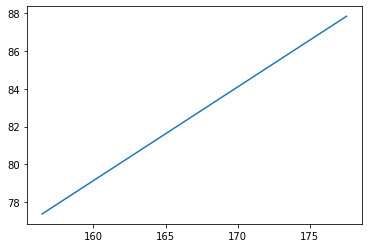

[[17.2693882]]


KeyboardInterrupt: 

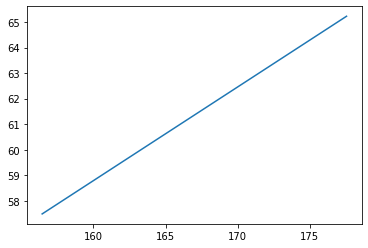

In [35]:
from scipy.special import expit
import matplotlib.pyplot as plt

def draw(x1, x2):
    ln = plt.plot(x1, x2, '-')
    plt.pause(0.001)
    ln[0].remove()


def sigmoid(z):
#     sig = 1 / (1 + np.exp(-z)) #The expit function will handle the input values more gracefully and return the sigmoid values without triggering the overflow warning.
    z = np.clip(z, -500, 500)
    sig = expit(z)
    return sig

def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    # print("m shape: ", m)
    p = sigmoid(points*line_parameters)
    # print(p)
    epsilon = 1e-15
    p = np.clip(p, epsilon, 1 - epsilon)# A small value to prevent Nan issues
    cross_entropy=-(1/m)*(np.log(p).T*y + np.log(1-p).T*(1-y))
    # print(cross_entropy)
    return cross_entropy


def gradient_descent(line_parameters, points, y, alpha):#alpha is learning rate. Gradient descent better classify our data 
    m = points.shape[0]
    for i in range(2000): #the more we increase the number of iterations the better classify we get our data
#         print(len(points))
#         print(len(line_parameters))
        p = sigmoid(points*line_parameters)
#         print("shape of p: ", p.shape)
#         print("shape of y: ", y.shape)
        gradient = (points.T * (p - y))*(alpha/m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max()])
        x2 = - b / w2 + (x1 * (- w1 / w2))
        print(calculate_error(line_parameters, points, y))
        draw (x1, x2)


n_pts = 10
class_0_data = np.random.multivariate_normal(mu1, covariance_matrix, n_pts)
class_1_data = np.random.multivariate_normal(mu2, covariance_matrix, n_pts)
np.random.seed(0)
bias = np.ones((n_pts*2,1))
labels_0 = np.zeros(n_pts)
labels_1 = np.ones(n_pts)
data = np.vstack((class_0_data, class_1_data))
print(data.shape)
# print(bias)

all_points = np.hstack((data, bias))
print(all_points.shape)

y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
# print(y)
line_parameters = np.matrix([np.zeros(3)]).T
print(y.shape)


_, ax = plt.subplots(figsize=(4, 4))
ax.scatter(class_0_data[:, 0], class_0_data[:, 1], color='r')
ax.scatter(class_1_data[:, 0], class_1_data[:, 1], color='b')


gradient_descent(line_parameters, all_points, y, 0.3)

# labels = np.concatenate((labels_0, labels_1), axis=0)
# y = labels.reshape(n_pts*2, 1)

# print(y)




In [39]:
line_parameters = np.matrix([np.ones(3)]).T*0.01
print(line_parameters)

[[0.01]
 [0.01]
 [0.01]]


In [28]:
n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T #take transpose
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T #take transpose
all_points = np.vstack((top_region, bottom_region))
print(all_points.shape)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
print(y.shape)

(200, 3)
(200, 1)


In [29]:
line_parameters = np.matrix([np.ones(3)]).T*0.00001
print(line_parameters.shape)

(3, 1)
